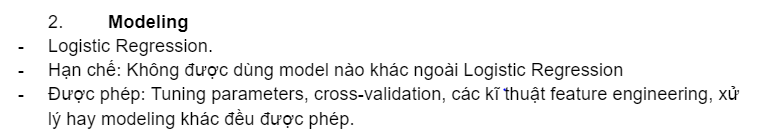

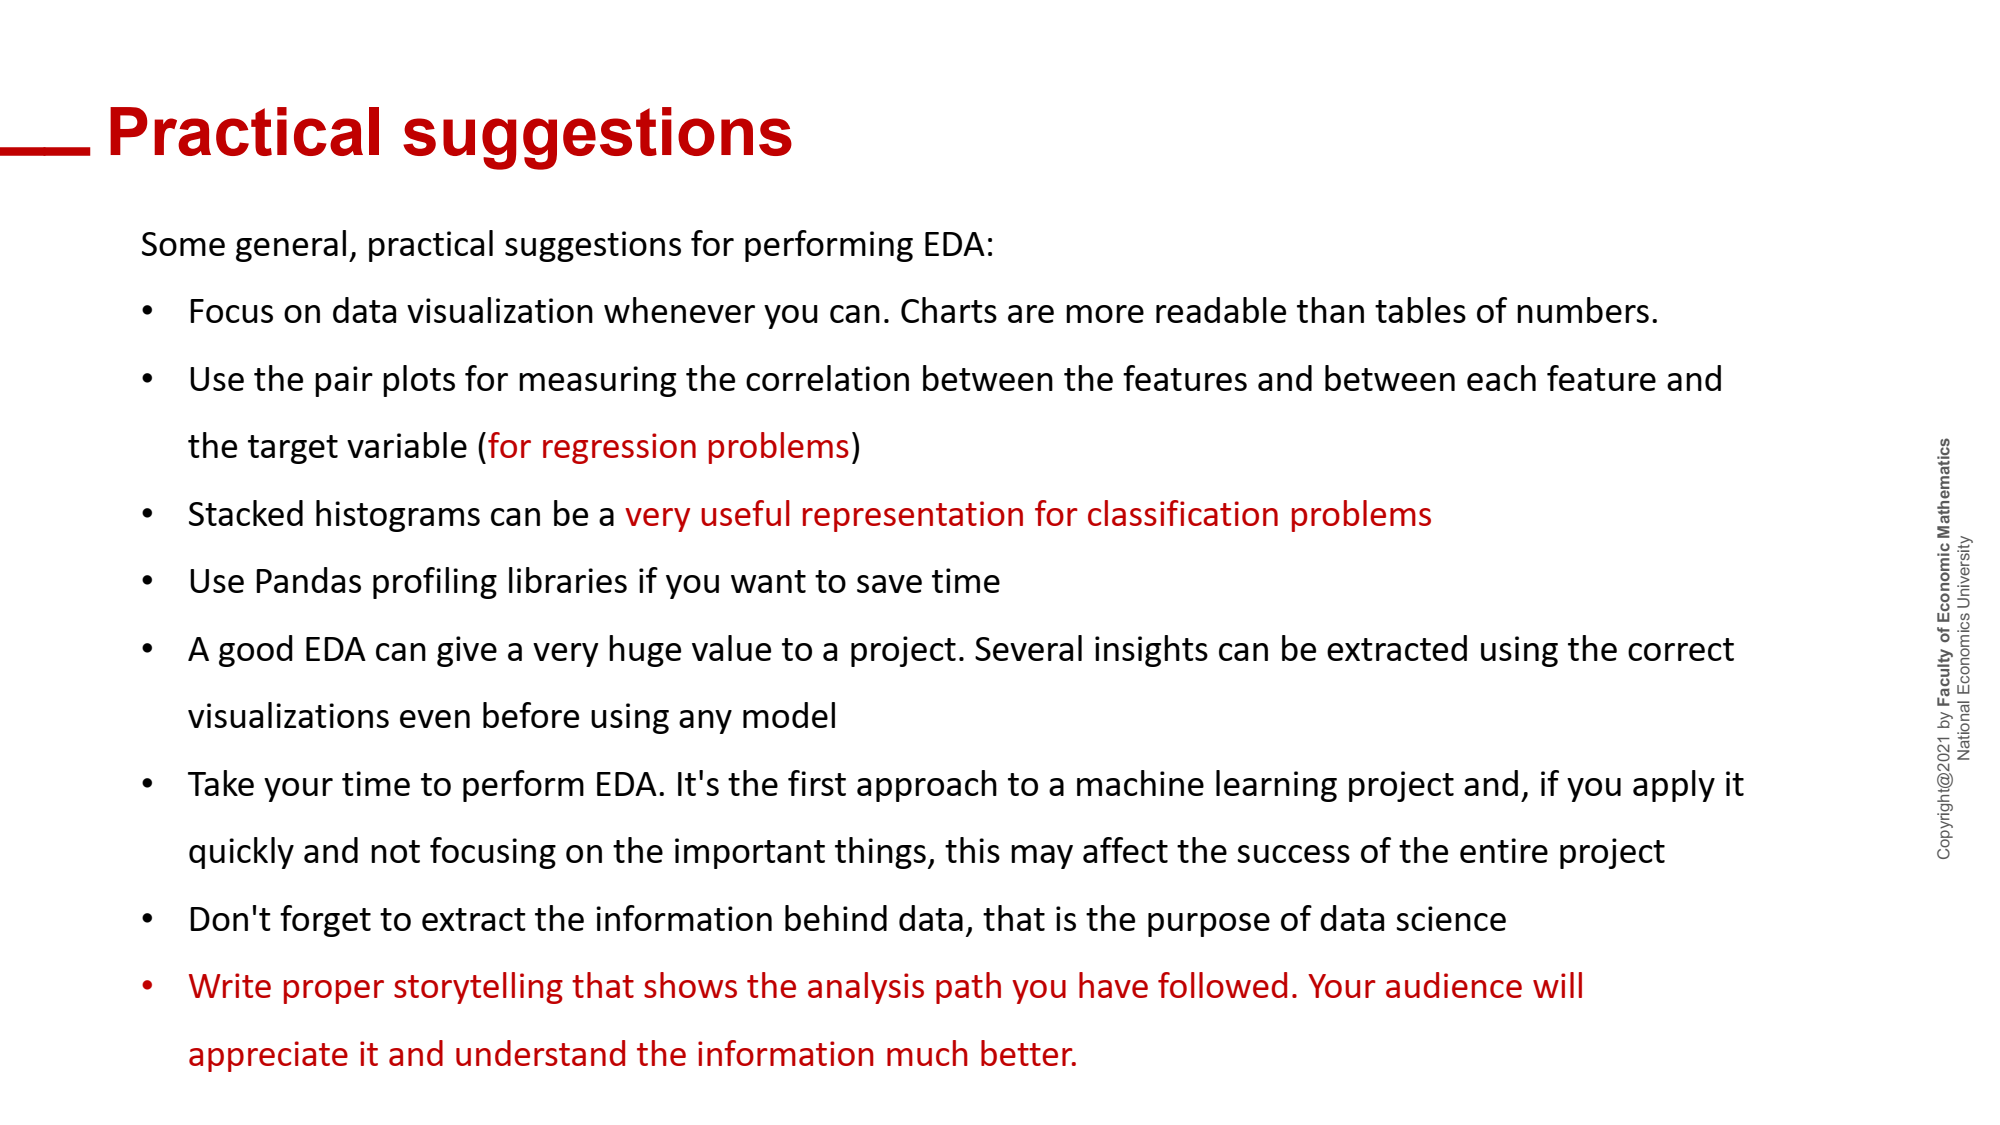

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file = ['dseb63_application_test','dseb63_application_train','dseb63_bureau',\
        'dseb63_bureau_balance', 'dseb63_credit_card_balance','dseb63_installments_payments',\
        'dseb63_POS_CASH_balance','dseb63_previous_application']
link = 'D:\\Năm 3 - HK1\\Visualize\\Ex\\final_project\\dseb63_final_project_DP_dataset\\dseb63_final_project_DP_dataset\\'
df = pd.read_csv(link + file[1]+'.csv',index_col='Unnamed: 0')

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246009 entries, 0 to 246008
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DA

# Percentage Null values of each column

In [4]:
# f, ax = plt.subplots(figsize=(16,16))
# sns.barplot((df.isnull().sum()/df.shape[0]).sort_values(ascending=False).head(60),\
#            orient='h',width=0.4,palette='ch:s=.6,r=-.2',)
# ax.spines[['right','top','bottom','left']].set_visible(False)
# ax.tick_params(left=False)
# ax.xaxis.tick_top() 
# ax.grid(axis='x')
# ax.set_title('Top 60 feature with highest percentage null values',size=15,y=1.04,x=0.4)

#drop
col_drop =  (df.isnull().sum()/df.shape[0]).sort_values(ascending=False).index[:50].tolist()

In [5]:
corr = pd.DataFrame(df.corr()).fillna(0)

def visual_corr(df, feature,n,ax):
    pos = df.loc[feature].sort_values()[-(n+1):-1]
    neg = df.loc[feature].sort_values()[:n]
    t = df.loc['TARGET',feature]
                   
    new = pd.concat((pos,neg))
    new.loc['TARGET'] = t
    new = new.sort_values(ascending=False)
    # f, ax = plt.subplots(figsize=(8,5))
    sns.barplot(new.squeeze() ,orient='h',ax = ax,alpha=0.3,width=0.5)

    ax.spines[['top','bottom']].set_visible(False)
    ax.spines[['left','right']].set_color('grey')
    ax.xaxis.tick_top()
    ax.tick_params(left = False,top = False)
    ax.set_xticklabels('')
    l= ax.get_xlim()[1] - ax.get_xlim()[0]

    for p in ax.patches:
        x,y = p.get_xy()
        width = p.get_width()
        # height = p.get_height()
        if width <= 0:
            ax.annotate(xy = (x+l/30 , y+0.4 ), text = str(int(width*100))+'%')
        else:
            ax.annotate(xy = (x-l/16 , y+0.4 ), text = str(int(width*100))+'%')
    sns.barplot(new.tail(n).squeeze() ,orient='h',ax = ax,color ='red',alpha=0.3,width=0.5)
    sns.barplot(data = {'TARGET': t} ,orient='h',ax = ax,color ='lightgreen',alpha=1,width=0.5,\
                edgecolor= 'green')
    
    for i in range(len(new)):
        if new.index[i] == 'TARGET':
            ax.axhline(y=i,linewidth=25, color = 'grey', alpha = 0.2)
            if t <= 0:
                ax.text(x= l/10, y =i+0.14, s = feature + ' correlate with TARGET')
            else:
                ax.text(x= t+l/10, y =i+0.14, s = feature + ' correlate with TARGET')

    # ax.set_yticklabels(list(new.index), fontdict = {'horizontalalignment': 'left'})
    # ax.axvline(ax.get_xlim()[1]+l/30,color = 'grey',alpha = 0.2)
    ax.set_xlim(ax.get_xlim()[0]-l/24,ax.get_xlim()[1])
    # for i in range(len(new)):
        # ax.yaxis.get_majorticklabels()[i].set_x(0.7)
    ax.set_xlabel('')
    yticklabel = list(map(lambda x: x.replace('TARGET', ''), list(new.index)))
    ax.set_yticklabels(yticklabel)
    # print(xticklabel)

In [6]:
def num_visual(df,feature):
    """Visualize numeric, continuous feature"""
    f, ax = plt.subplots(2,3,figsize =(16,8)) #,gridspec_kw={'width_ratios':[1,2,2,2]}
    # calculate upper and lower fence 
    l,u = fence(df, feature)
    # closer look in to quartile, skewness, kurtosis, median, outliner
    # sns.boxplot(df[feature],ax=ax[1][0])
    # distribution of feature
    if u!= l:
        ax[0][0].hist(df[(df[feature]<u) & (df[feature]>l)][feature])
        
        # sns.histplot(df,x=feature ,kde=True,ax =ax[0][0])
        # cross_tabulation with Target variable
        ax[0][1].hist(df[(df['TARGET']==1) & (df[feature]<u) & (df[feature]>l)][feature],color ='red',alpha = 0.3,)
        ax[0][2].hist(df[(df['TARGET']==0) & (df[feature]<u) & (df[feature]>l)][feature],color ='green',alpha = 0.4)
    else:
        ax[0][0].hist(df[feature])
        # cross_tabulation with Target variable
        ax[0][1].hist(df[(df['TARGET']==1)][feature],color ='red',alpha = 0.3,)
        ax[0][2].hist(df[(df['TARGET']==0)][feature],color ='green',alpha = 0.4)


    # beautify
    # ax[0].set_ylabel(feature+'\n'+'_'*35+'\n\n',fontweight = 'bold',fontsize=12)
    for i in range(3):
            ax[0][i].spines[['top','bottom','left','right']].set_color('grey')
            ax[0][i].tick_params(left=False, bottom = False)
            ax[0][i].grid(axis = 'y')

    gs = plt.GridSpec(2,12,wspace = 0.3)
    for ax in ax[1,:]:
        ax.remove()
    axnew = f.add_subplot(gs[1,5:11])
    visual_corr(corr ,feature,5,axnew)
    axnew2 = f.add_subplot(gs[1,1:3])
    sns.boxplot(df[feature],ax=axnew2)
    axnew2.spines[['top','bottom','left','right']].set_color('grey')
    axnew2.tick_params(left=False, bottom = False)
    f.tight_layout(h_pad=3)


In [7]:
def fence(df, feature):
    q1 = df[feature].quantile(0.25)
    q3 = df[feature].quantile(0.75)
    upper = q3 + 1.5*(q3-q1)
    lower = q1 - 1.5*(q3-q1)
    return lower, upper

def cat_visual(df,feature):
    f, ax = plt.subplots(1,3,figsize = (5*3,4),gridspec_kw={'width_ratios':[1.5,2,2]})
    #1
    sns.barplot(df[feature].value_counts(),orient='h',ax=ax[0],palette='Set2',width = 0.5)
    ax[0].spines[['top','bottom','left','right']].set_visible(False)
    ax[0].tick_params(left=False)
    ax[0].xaxis.tick_top() 
    ax[0].set_xlabel('')
    #2
    ax[1].pie(x=df[df['TARGET']==1][feature].value_counts(),\
    labels=df[df['TARGET']==1][feature].value_counts().index,\
    startangle=90,autopct='%.2f%%') 
    #3
    ax[2].pie(x=df[df['TARGET']==0][feature].value_counts(),\
    labels=df[df['TARGET']==0][feature].value_counts().index,\
    startangle=90,autopct='%.2f%%') 
    
    #beautify
    ax[0].set_ylabel(feature+'\n'+'_'*30+'\n\n',fontweight = 'bold',fontsize=12)

    plt.tight_layout(w_pad=2,h_pad=2)

In [8]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
count,246009.000000,246009.000000,2.460090e+05,2.460090e+05,245999.000000,2.457850e+05,246009.000000,246009.000000,246009.000000,246009.000000,...,246009.000000,246009.000000,246009.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,212798.000000,246009.000000
mean,0.080794,0.416229,1.684589e+05,5.996410e+05,27120.238129,5.389827e+05,0.020855,-16038.946343,63852.612441,-4985.222248,...,0.000581,0.000496,0.000309,0.006480,0.006729,0.034211,0.266647,0.266920,1.901127,153580.509542
std,0.272519,0.720664,1.045297e+05,4.030980e+05,14510.634712,3.700520e+05,0.013818,4361.265483,141306.376949,3521.391396,...,0.024103,0.022264,0.017574,0.084239,0.106693,0.204336,0.911957,0.834132,1.870269,88764.127645
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-23416.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16506.000000,2.385000e+05,0.010006,-19682.000000,-2758.000000,-7482.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,76772.000000
50%,0.000000,0.000000,1.462500e+05,5.147775e+05,24903.000000,4.500000e+05,0.018850,-15755.000000,-1212.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,153390.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34654.500000,6.795000e+05,0.028663,-12418.000000,-288.000000,-2006.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,230433.000000
max,1.000000,19.000000,1.350000e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,3.000000,9.000000,8.000000,27.000000,261.000000,25.000000,307510.000000


In [9]:
df.describe(include=["object", "category"])
for col in df.select_dtypes(include=['object','category']).columns:
    print(col, "\n" ,df[col].unique())    

NAME_CONTRACT_TYPE 
 ['Cash loans' 'Revolving loans']
CODE_GENDER 
 ['F' 'M' 'XNA']
FLAG_OWN_CAR 
 ['N' 'Y']
FLAG_OWN_REALTY 
 ['N' 'Y']
NAME_TYPE_SUITE 
 ['Family' 'Unaccompanied' 'Spouse, partner' 'Children' 'Other_A' nan
 'Group of people' 'Other_B']
NAME_INCOME_TYPE 
 ['State servant' 'Working' 'Pensioner' 'Commercial associate' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE 
 ['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS 
 ['Married' 'Civil marriage' 'Single / not married' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE 
 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
OCCUPATION_TYPE 
 ['Core staff' 'Laborers' 'Managers' nan 'Drivers' 'Sales staff'
 'Cleaning staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'Accountants' 'Cooking staff' 'High skill tech staff'
 'Low-skill Laborers' '

In [10]:
# fig, ax = plt.subplots()
# ax.pie(df["TARGET"].value_counts(normalize= True), autopct='%1.1f%%', startangle=90, labels = ['0: Không trả được nợ','1: Trả được nợ'])
# plt.title('Target values',fontsize=25)
# plt.show()

Text(0.5, 1.0, 'Percentage of clients provide these document')

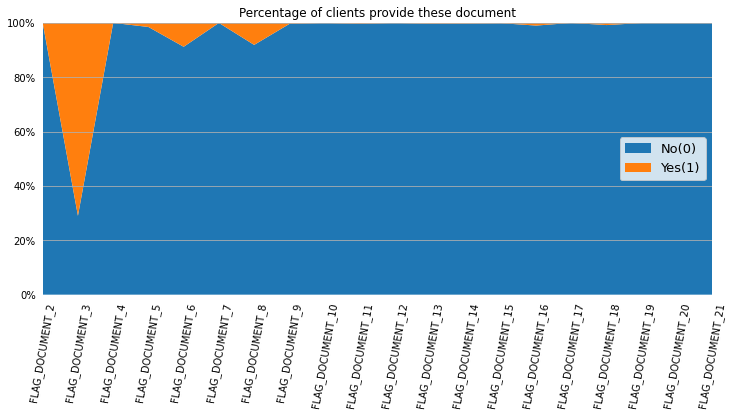

In [11]:
starting_idx = df.columns.get_loc("FLAG_DOCUMENT_2")
ending_idx = df.columns.get_loc("FLAG_DOCUMENT_21")+1
a = pd.DataFrame()
for i in range(starting_idx,ending_idx):
    a[df.columns[i]] = df.iloc[:,i].value_counts(normalize=True)
f, ax = plt.subplots(figsize=(12,5))
ax.stackplot(a.columns, a.iloc[0],a.iloc[1])
ax.set_xticklabels(a.columns,rotation=80)
ax.spines[['top','bottom','right','left']].set_visible(False)
ax.set_xlim(0,19)
ax.set_ylim(0,1)
ax.set_yticklabels(['0%','20%','40%','60%','80%','100%'])
ax.tick_params(left=False,bottom=False)
ax.grid(axis='y')
ax.legend(['No(0)','Yes(1)'],fontsize=13,loc = 'center right')
ax.set_title('Percentage of clients provide these document')


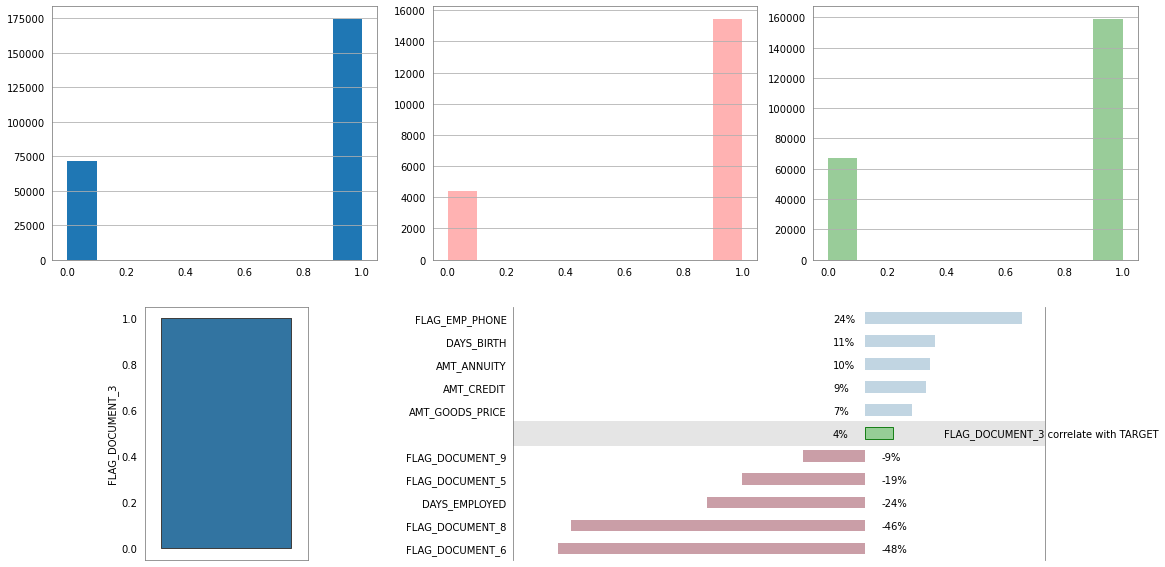

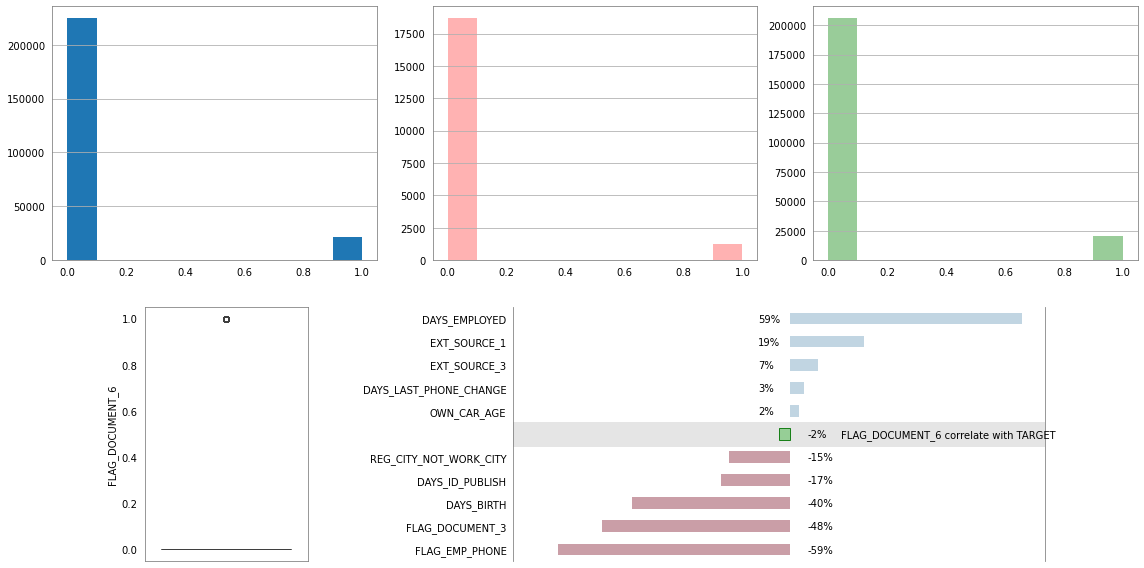

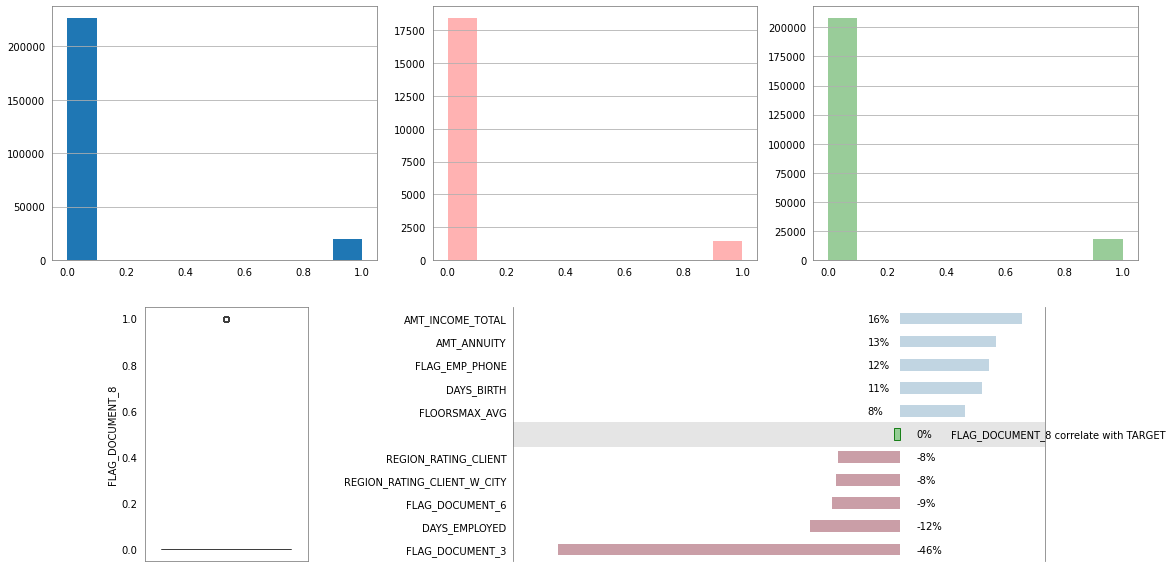

In [12]:
doc = ["FLAG_DOCUMENT_3","FLAG_DOCUMENT_6","FLAG_DOCUMENT_8"]
for col in doc:
    num_visual(df,col)

In [13]:
for i in range(starting_idx,ending_idx):
    col_drop.append(df.columns[i])
col_drop.remove('FLAG_DOCUMENT_3')
col_drop

['COMMONAREA_MODE',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'LANDAREA_MEDI',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION

# Social circle

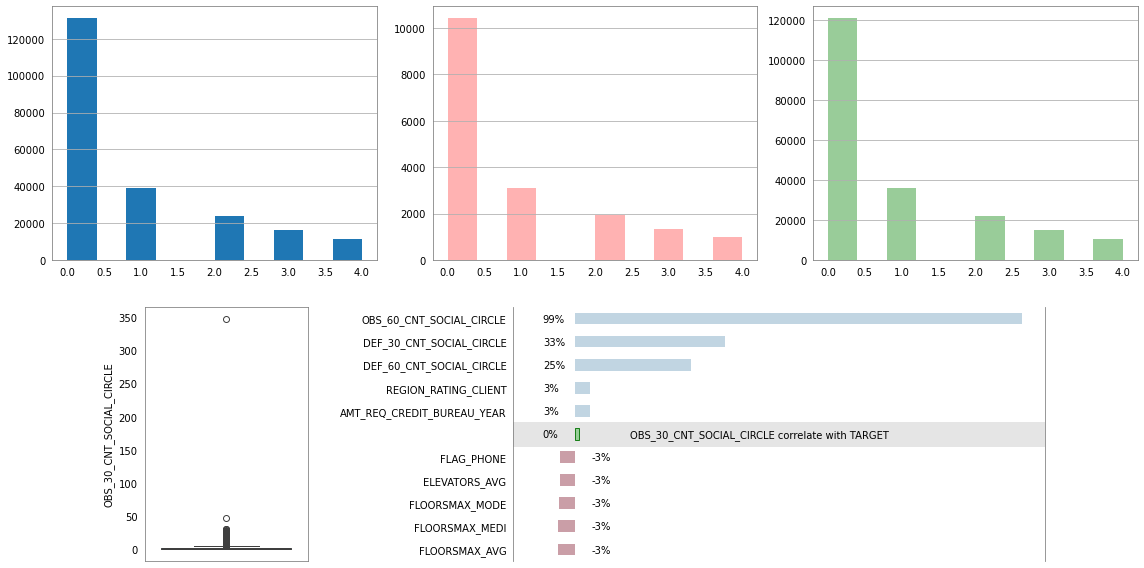

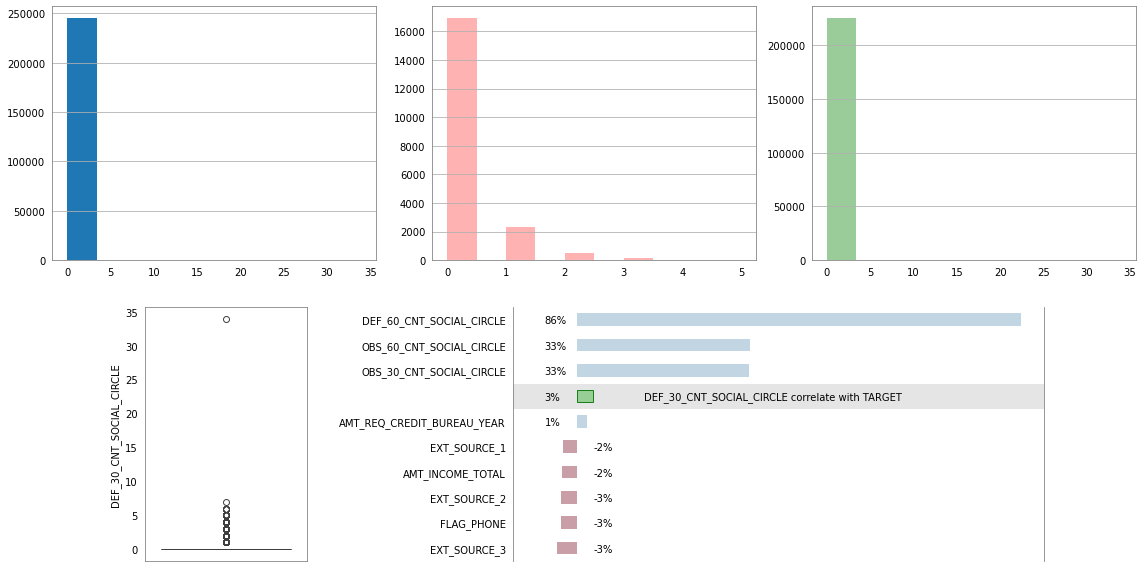

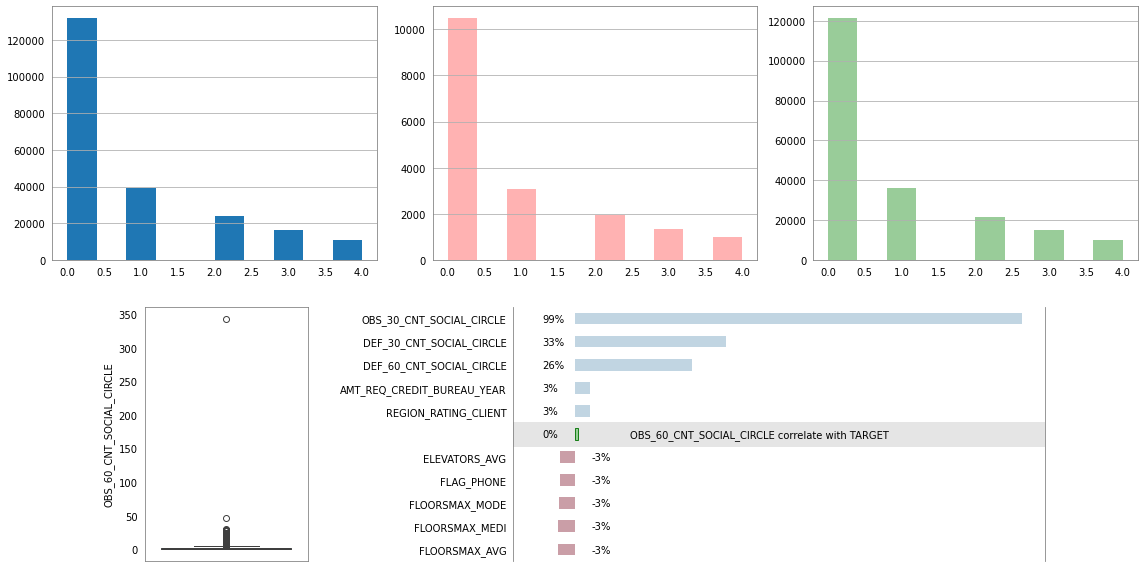

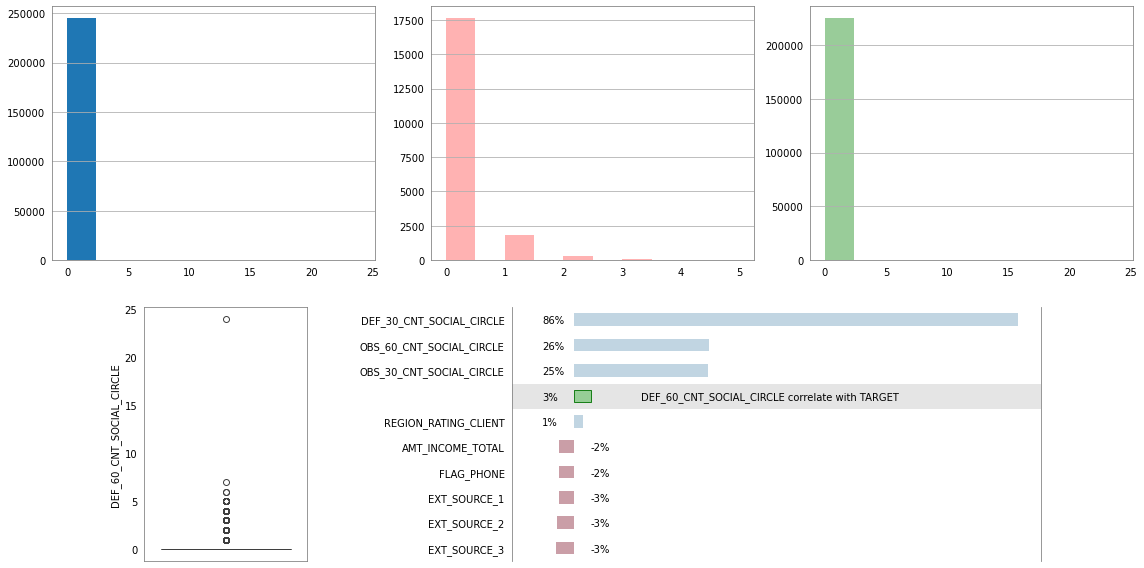

In [14]:
# consider whether social contact of clients have past due default more than N days
social = ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE']
df[social] = df[social].astype('int',errors='ignore')
for col in social:
    num_visual(df,col)


for i in ['OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE']:
    col_drop.append(i)


# Enquiries frequence

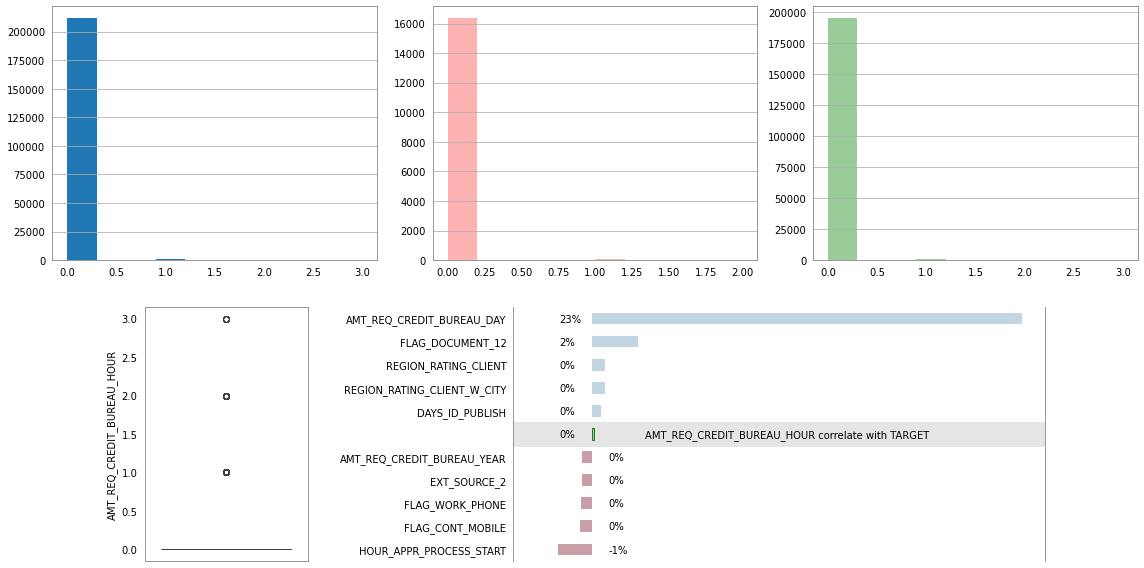

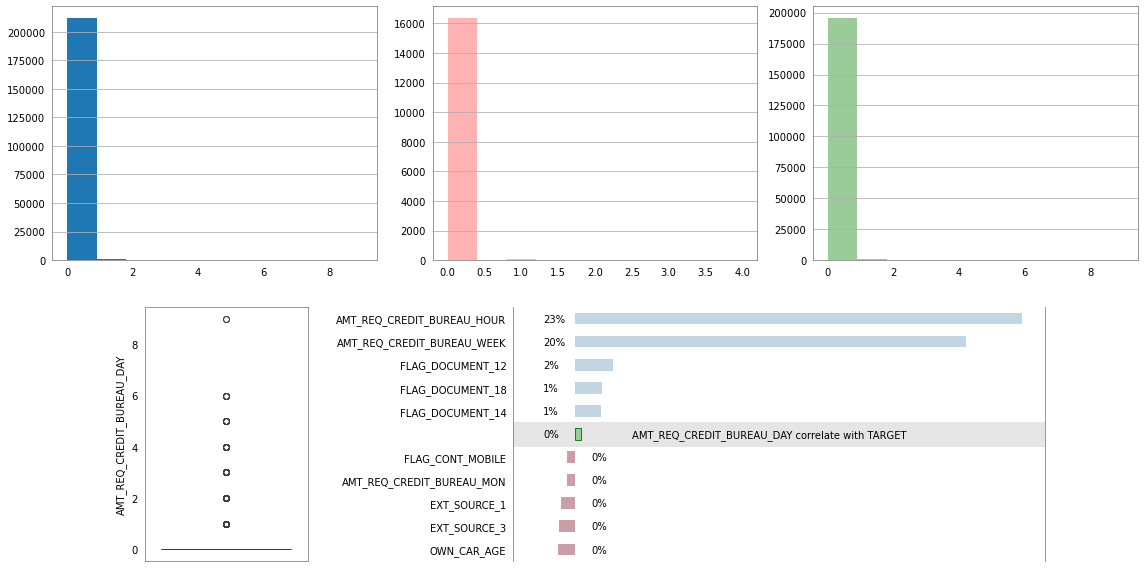

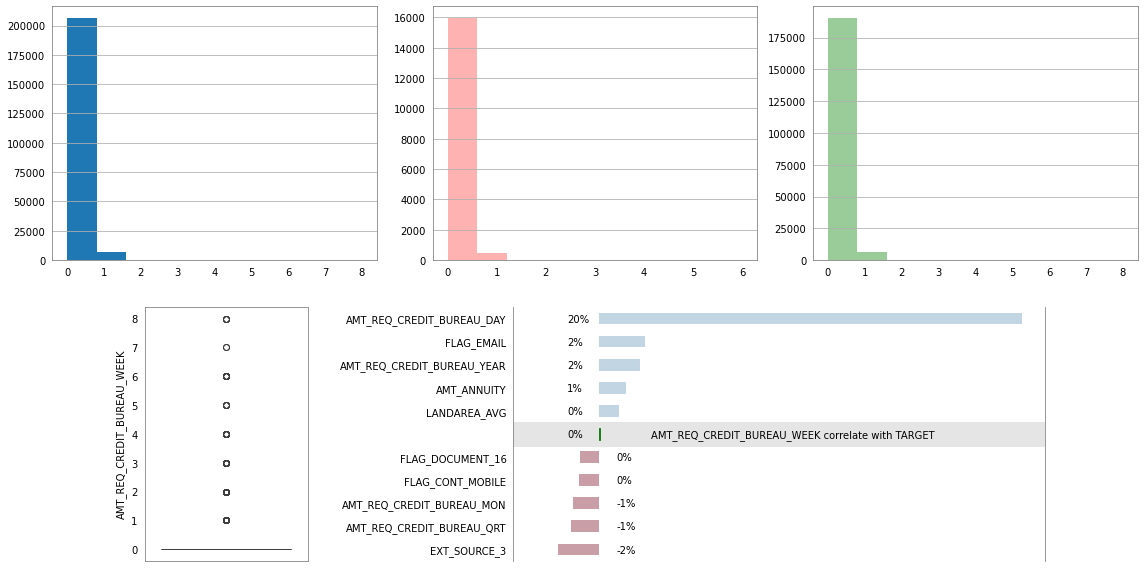

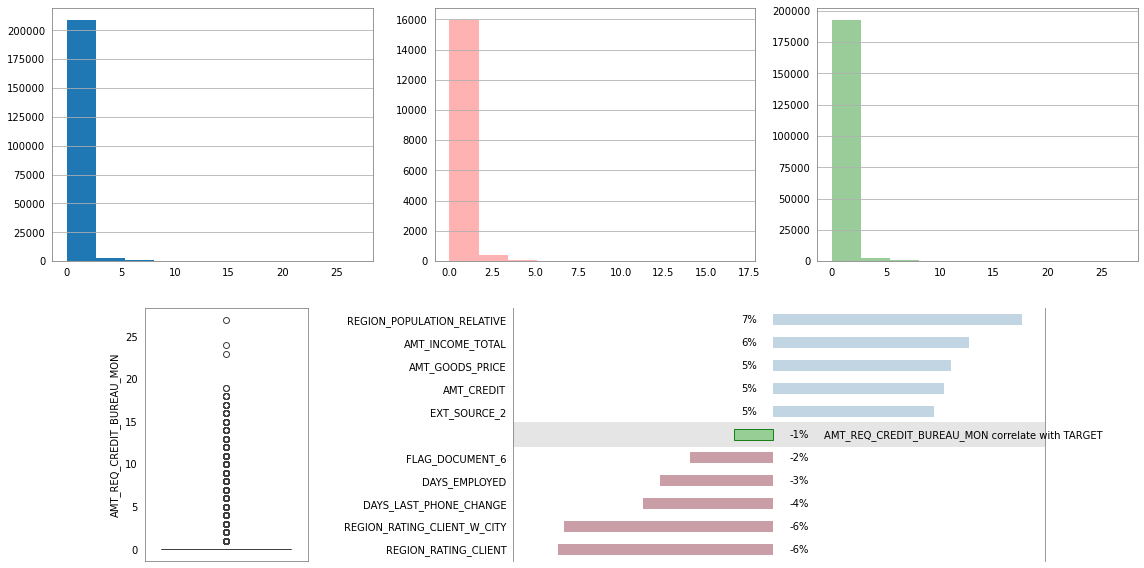

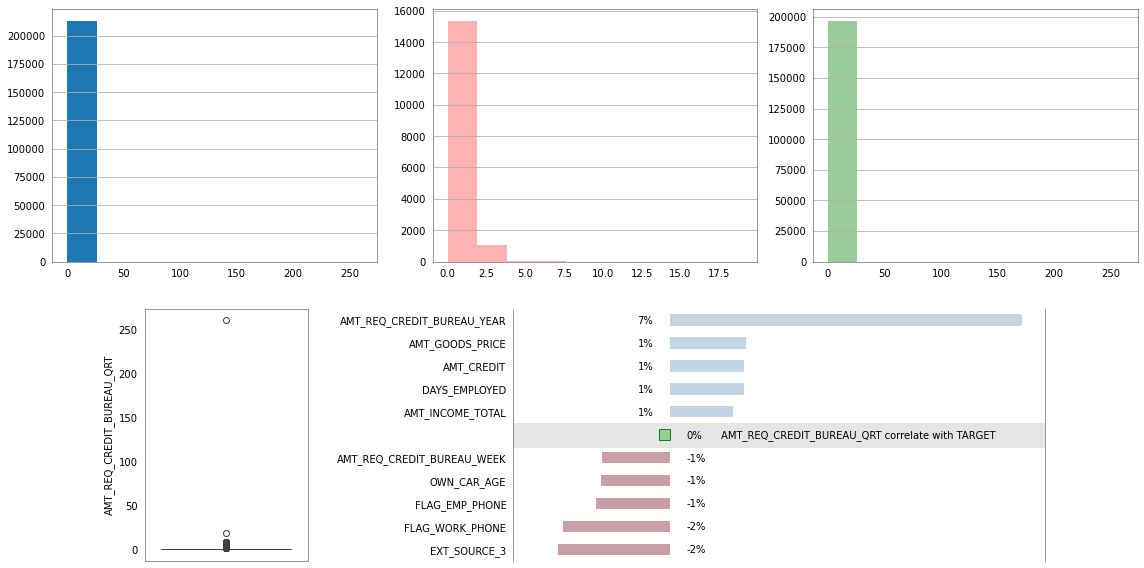

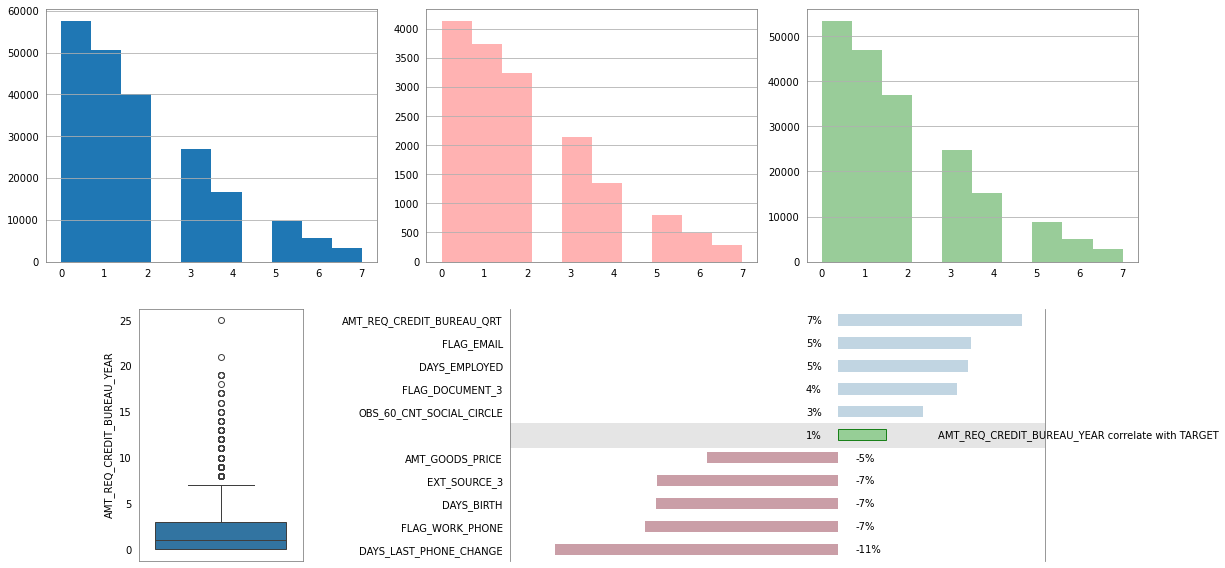

In [15]:
req = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
for col in req:
    num_visual(df,col)
#drop from hour to qrt
for i in ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT']:
    col_drop.append(i)

# External sources

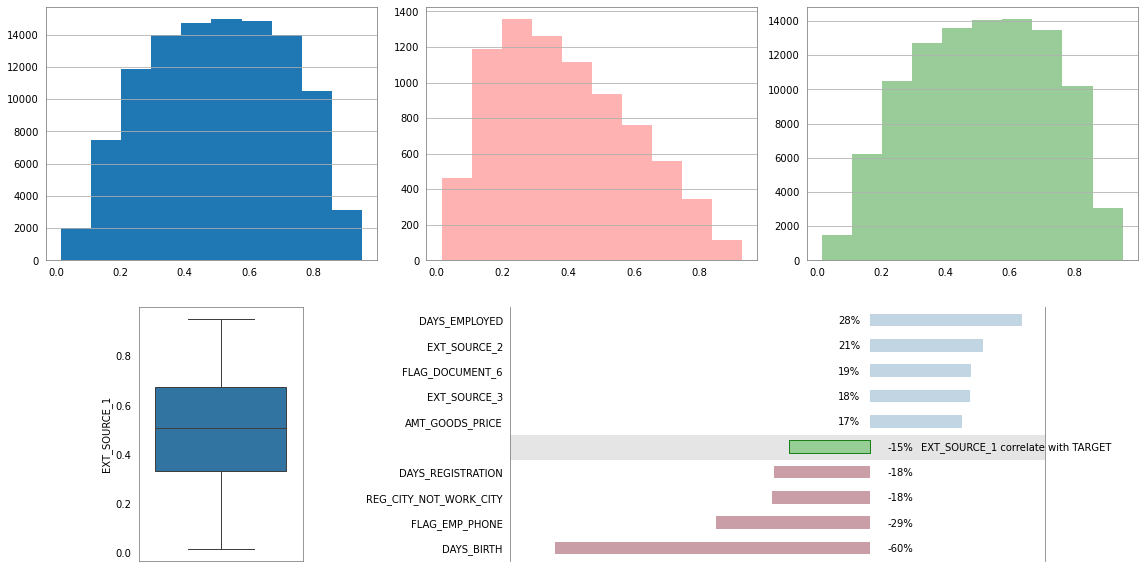

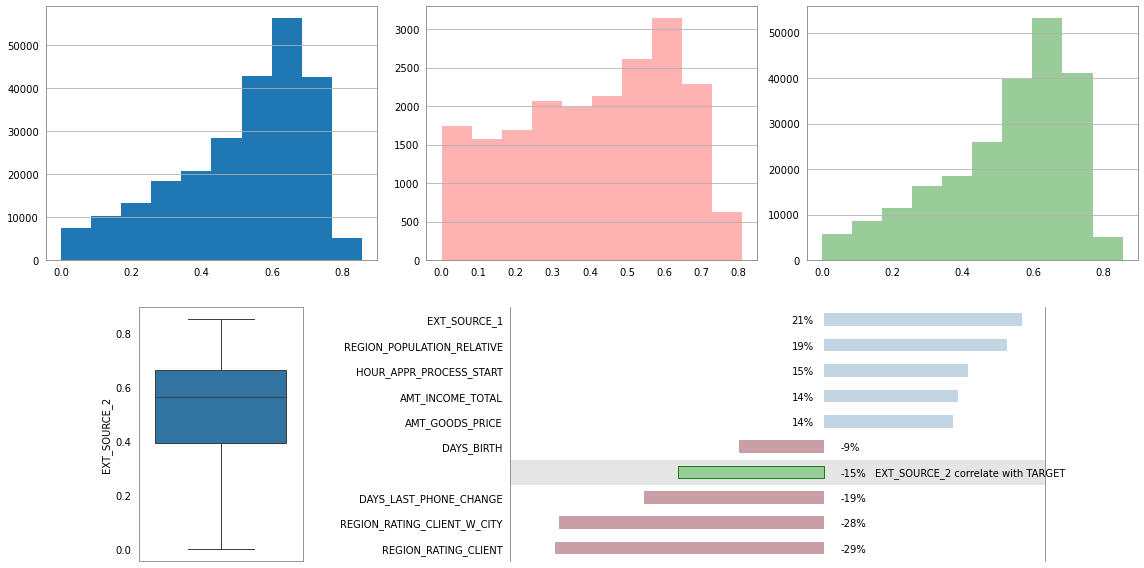

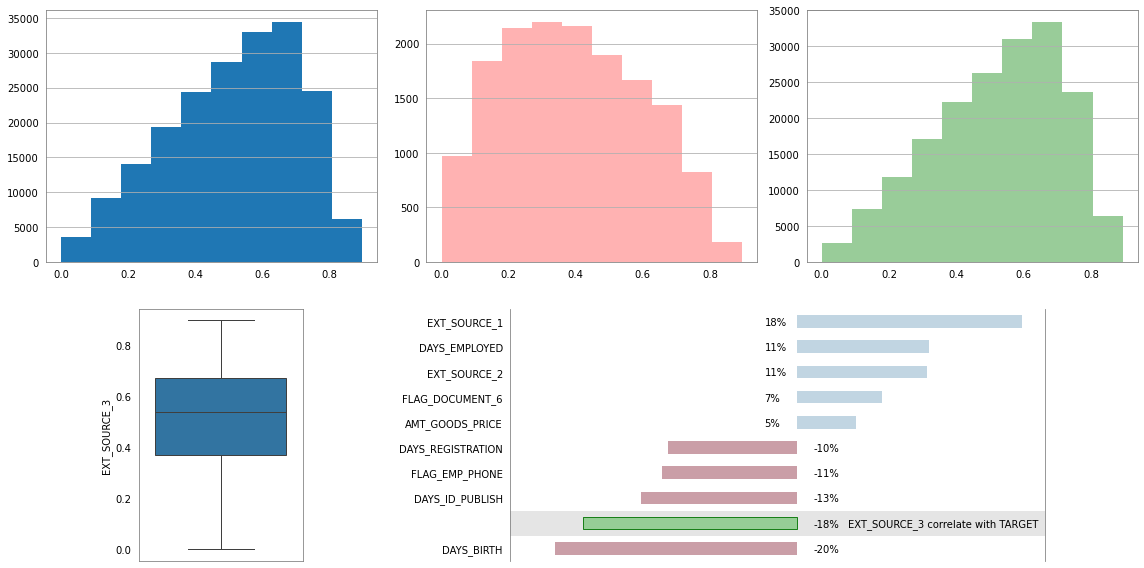

In [16]:
ext =['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
for col in ext:
    num_visual(df,col)

ex1, ext3 high missing value, consider more

# DAY TIMES

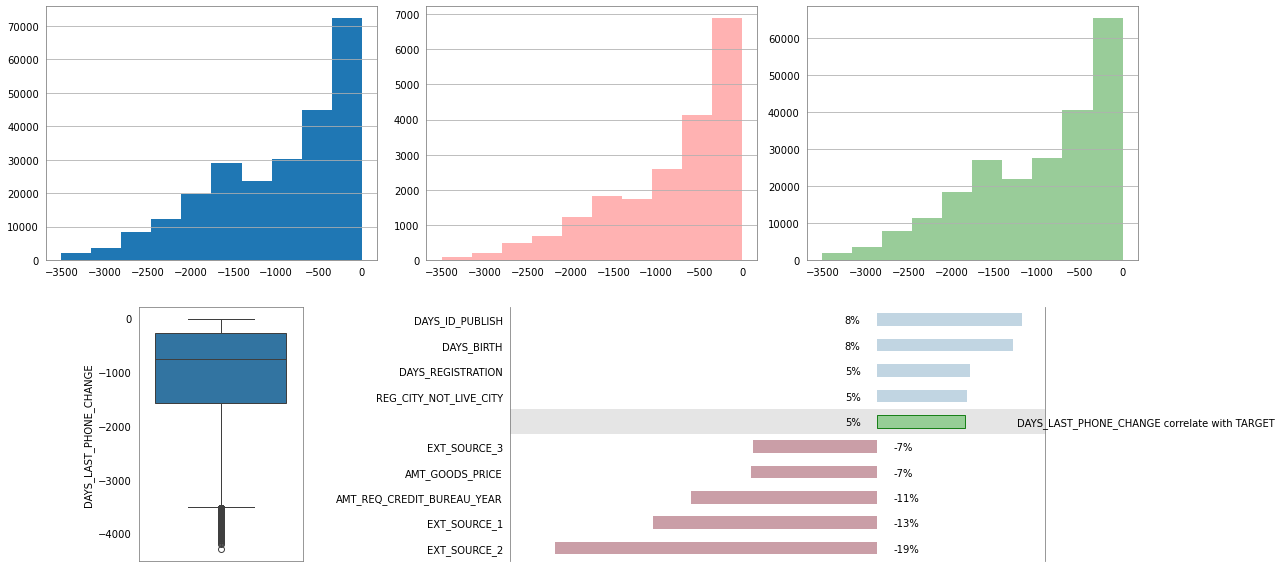

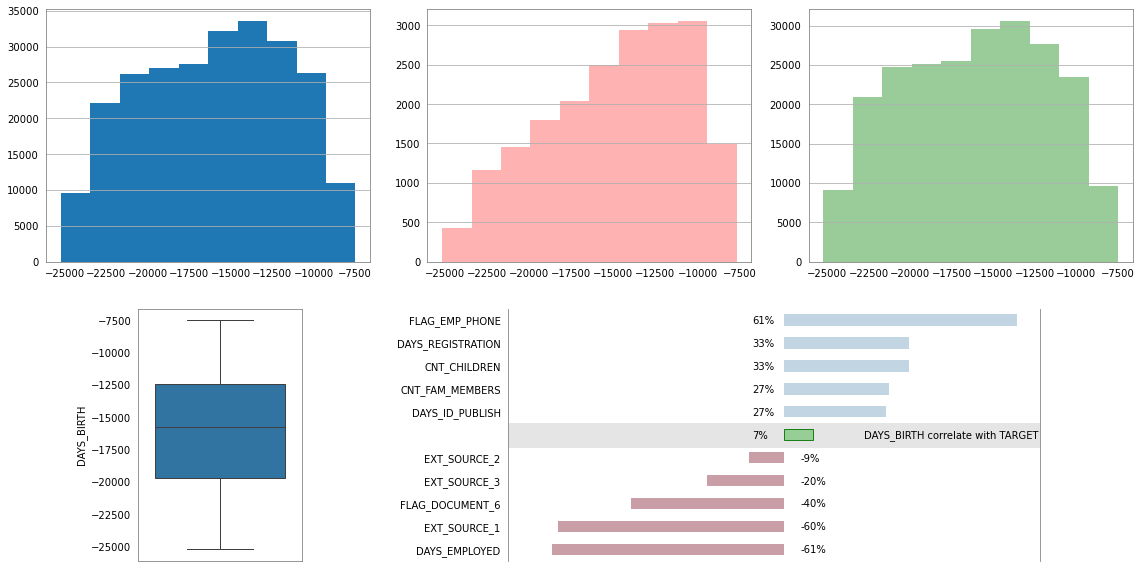

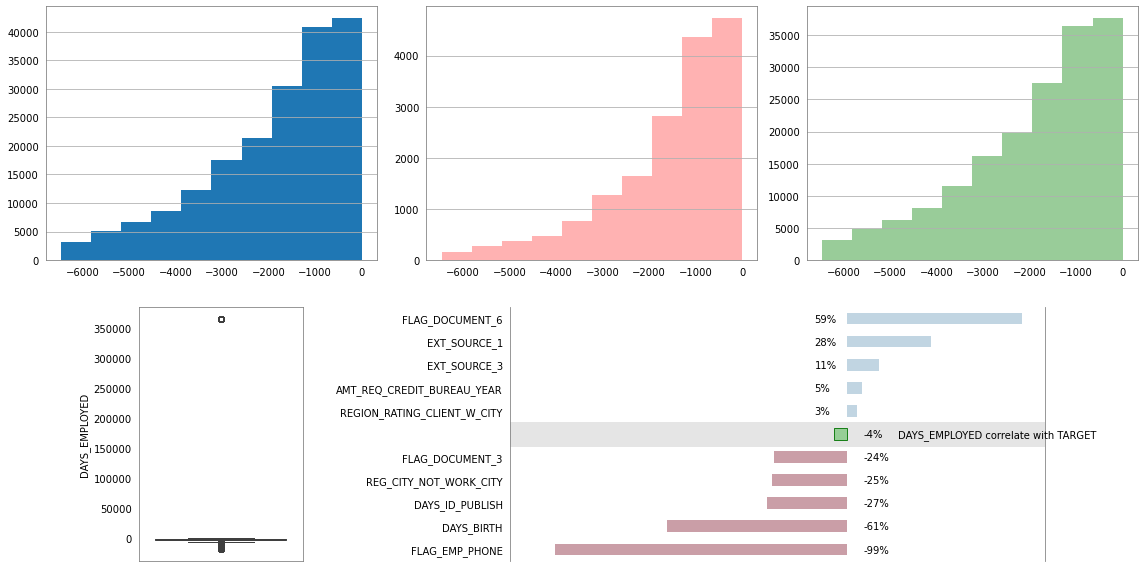

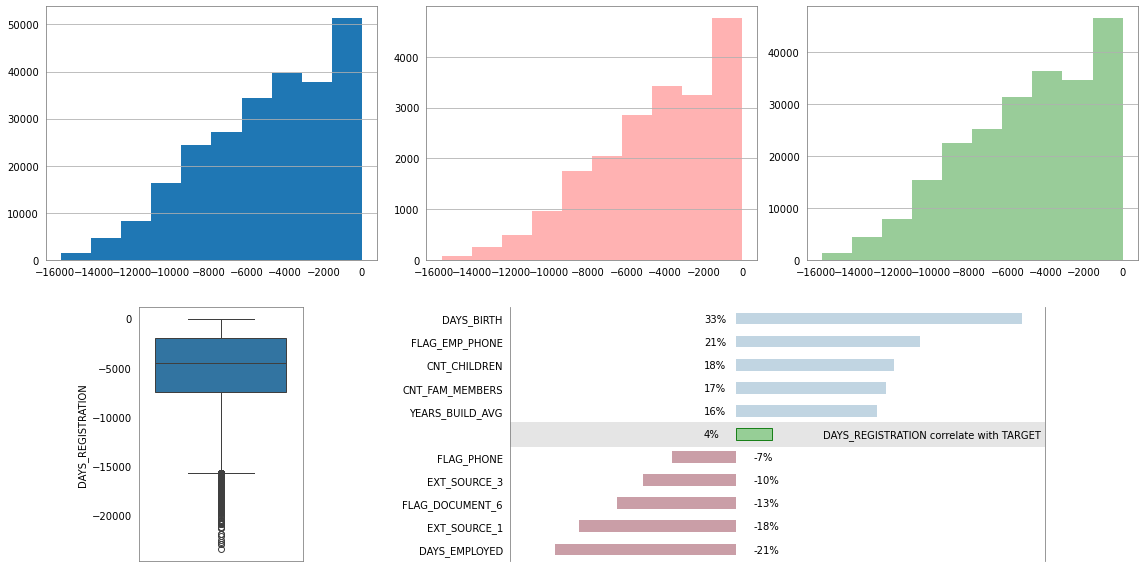

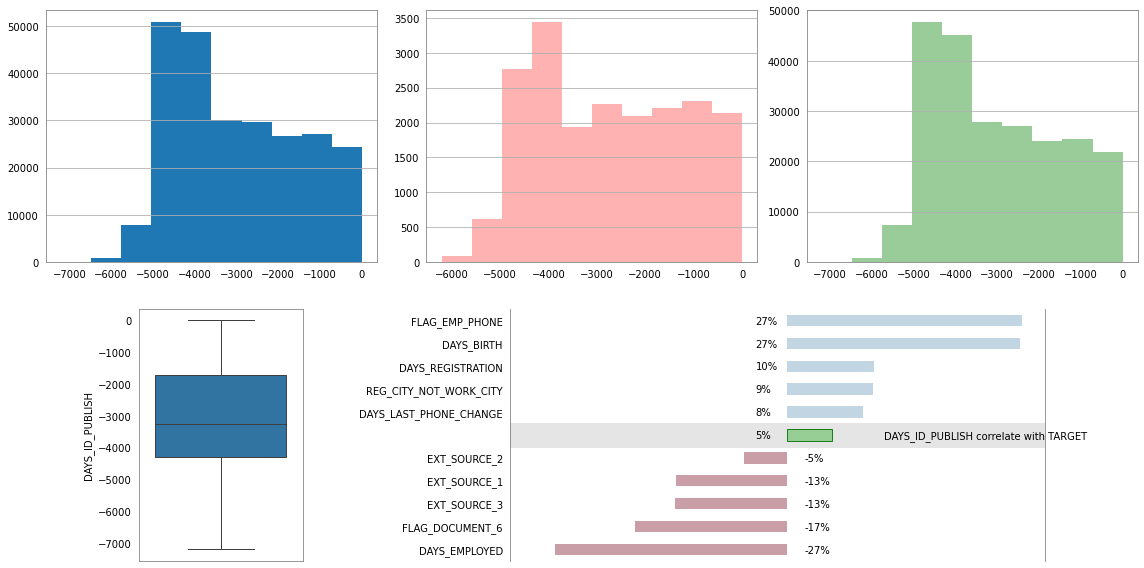

In [17]:
day = ['DAYS_LAST_PHONE_CHANGE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for col in day:
    num_visual(df,col)
# the last plot has no outliner
# negative days, outliner
# (df[df['DAYS_EMPLOYED']<(365*70)]['DAYS_EMPLOYED']/365).hist()
# visual of distribution of these feature at both target given
# the same shape may be dont have much infomation except 'DAY_BIRTH'


# CONTACT


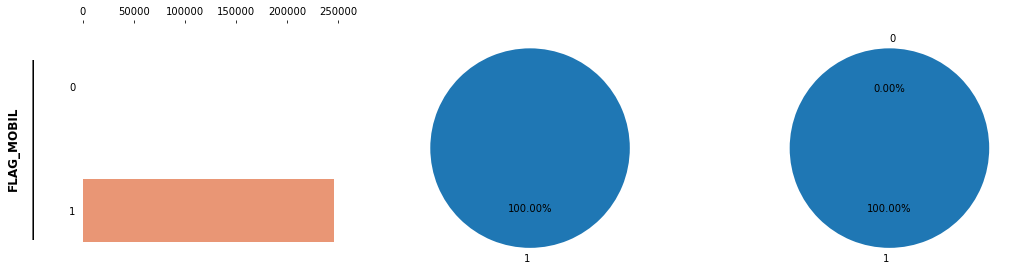

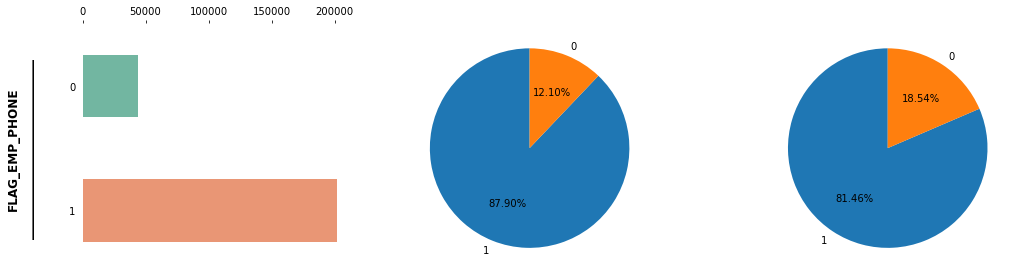

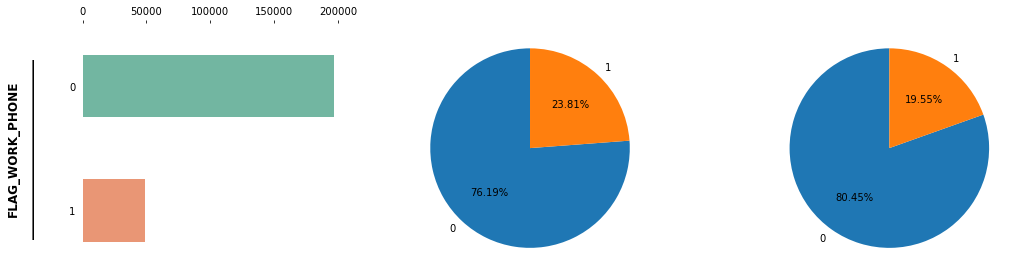

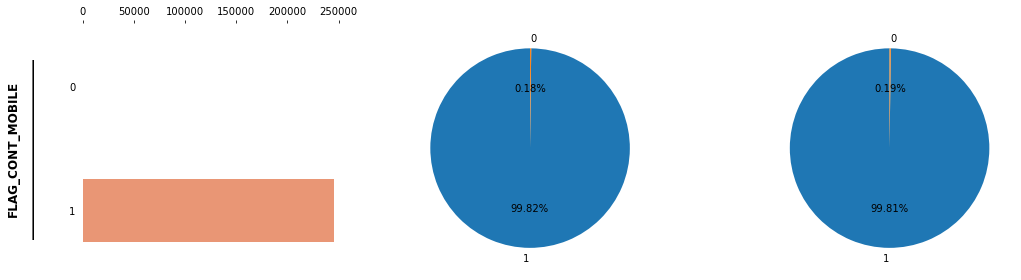

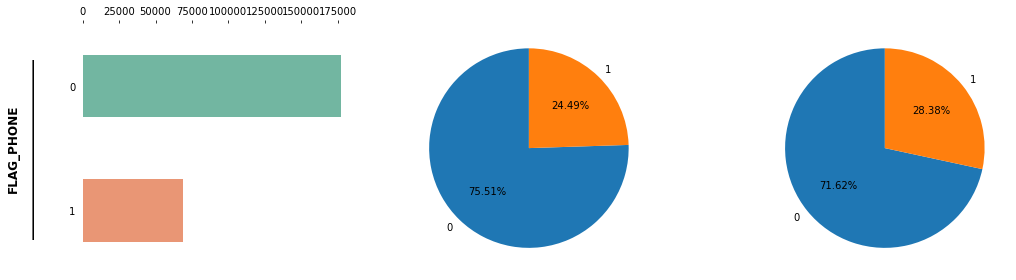

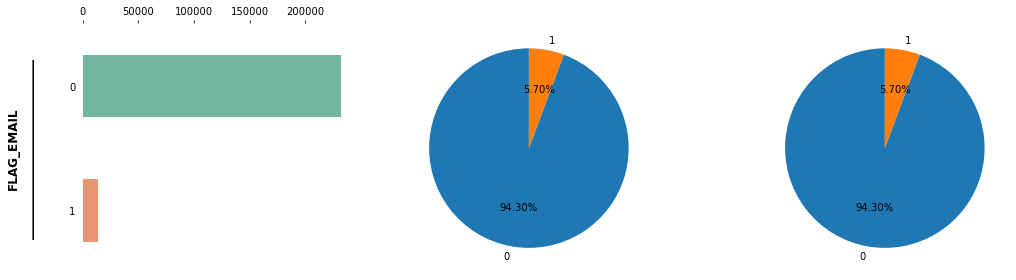

In [18]:
contact= ['FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL']
for col in contact:
    cat_visual(df,col)

for i in ['FLAG_MOBIL','FLAG_CONT_MOBILE','FLAG_EMAIL']:
    col_drop.append(i)

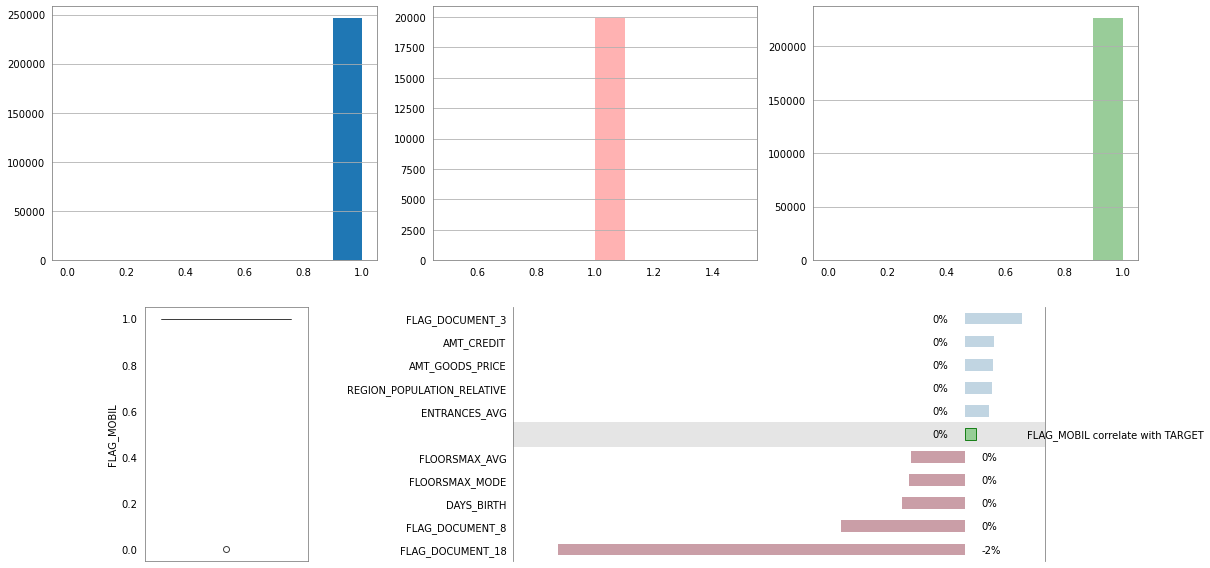

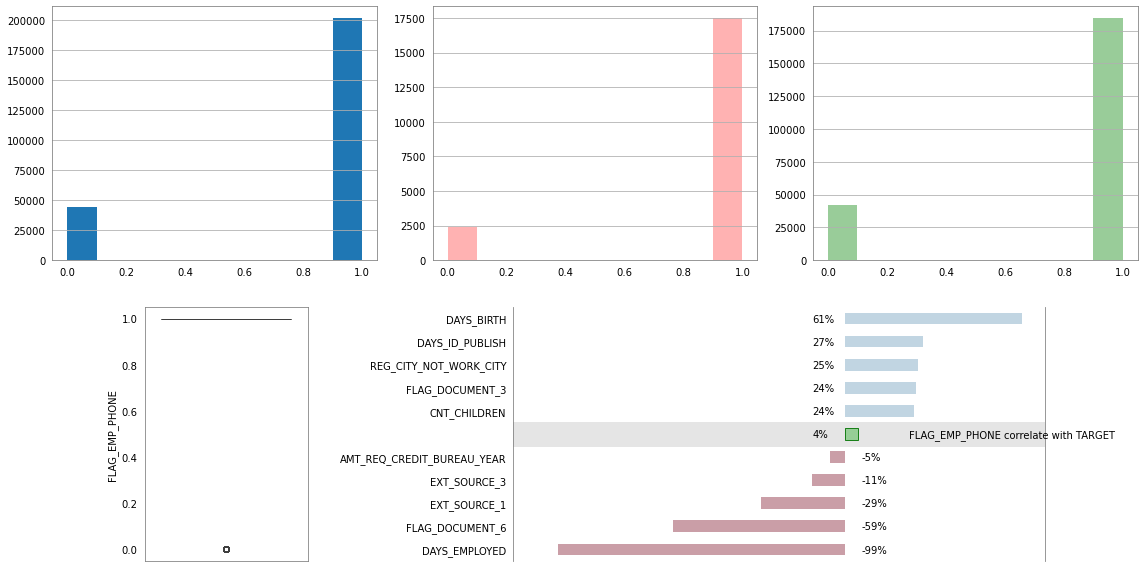

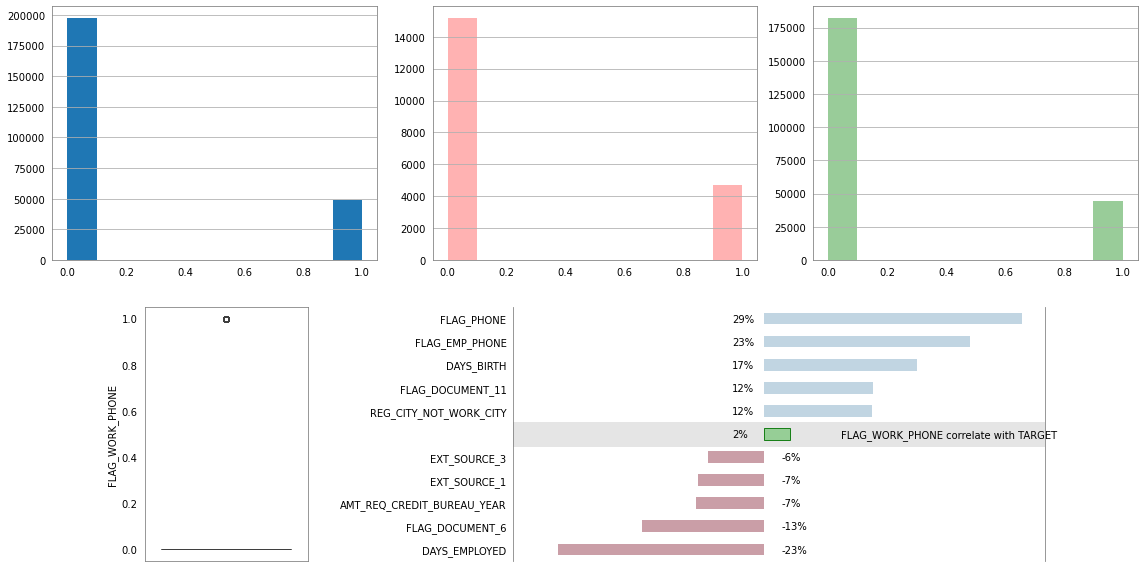

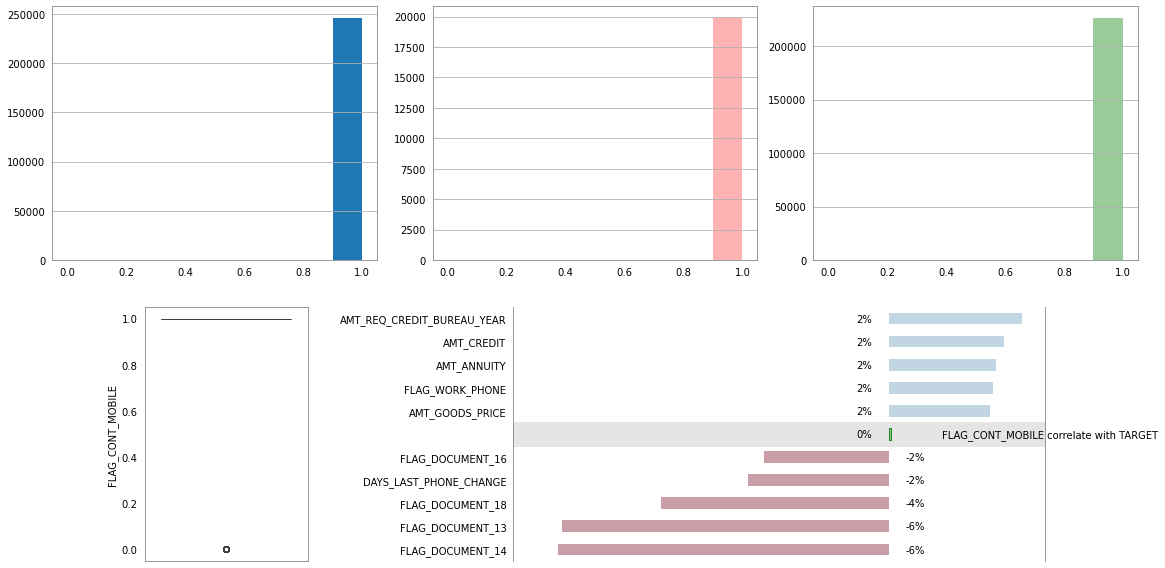

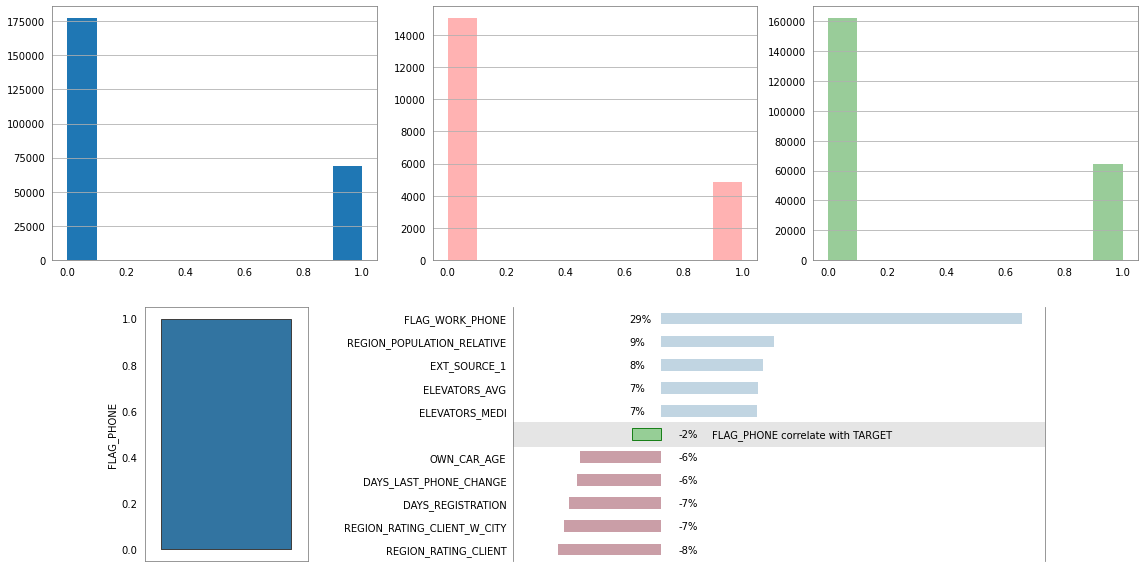

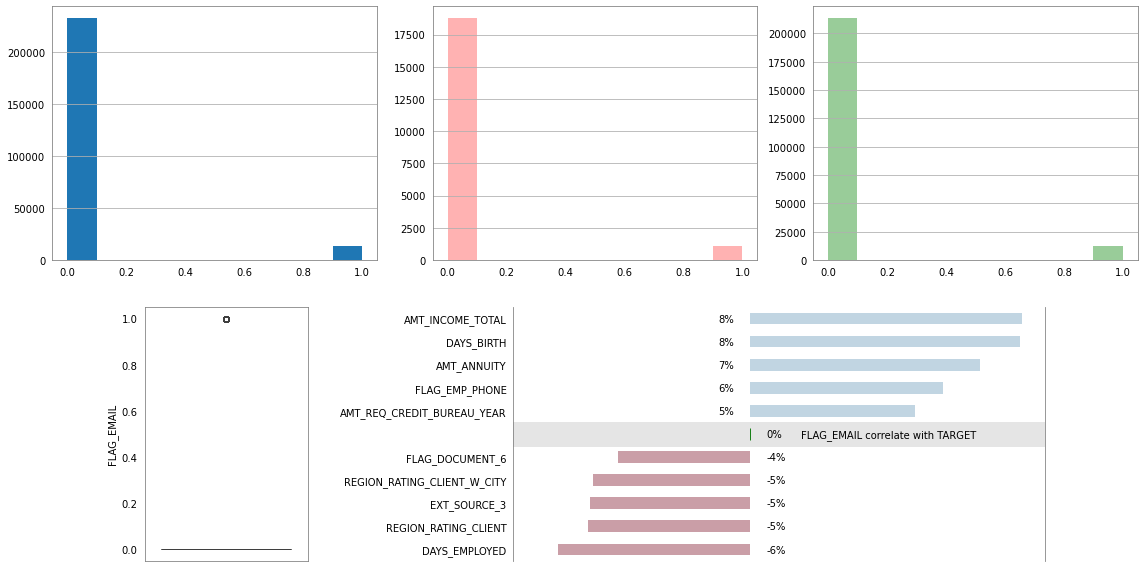

In [19]:
for col in contact:
    num_visual(df,col)

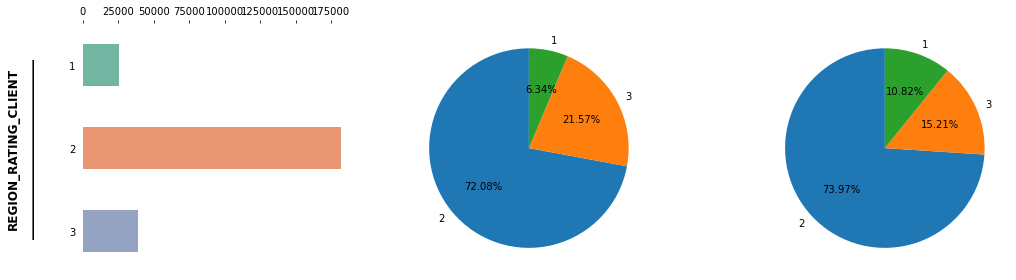

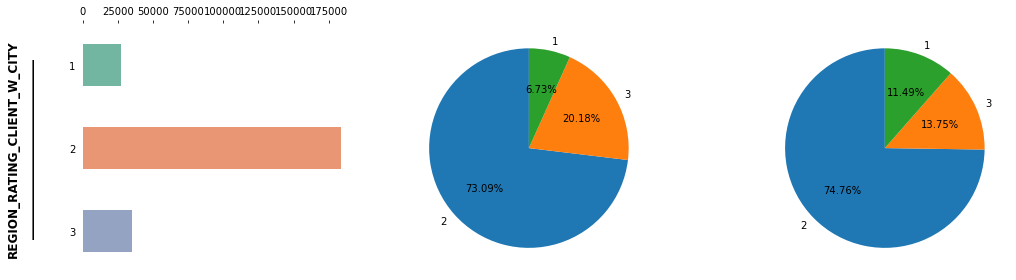

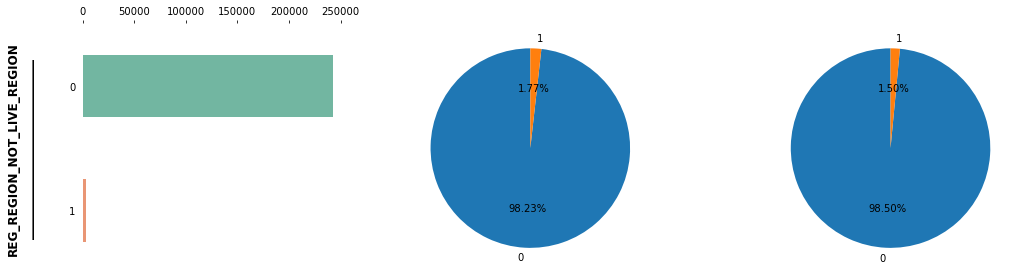

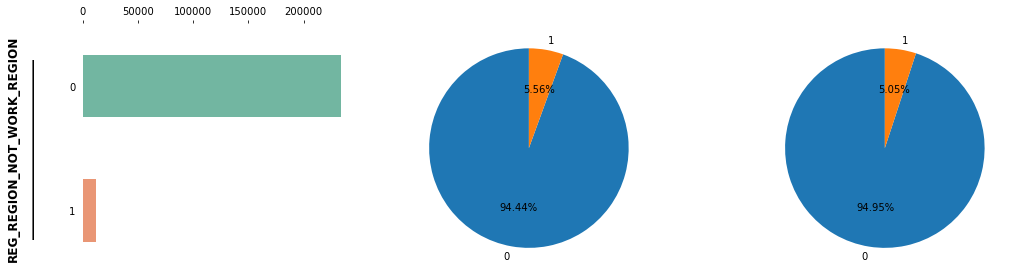

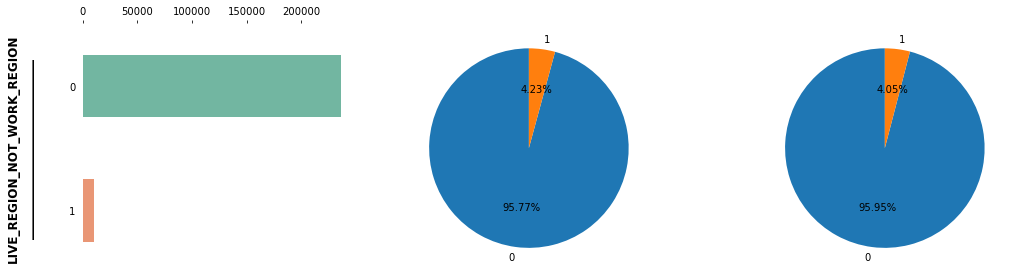

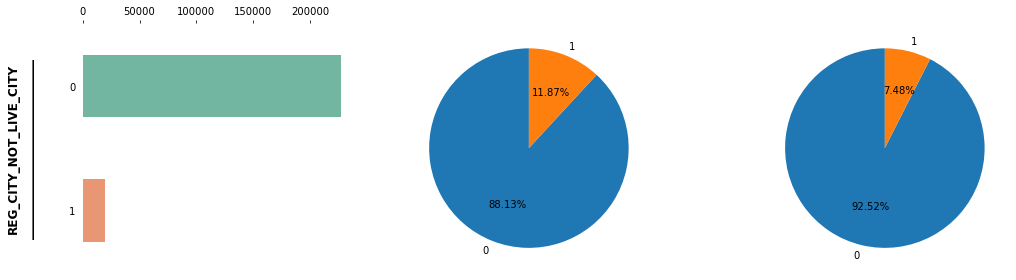

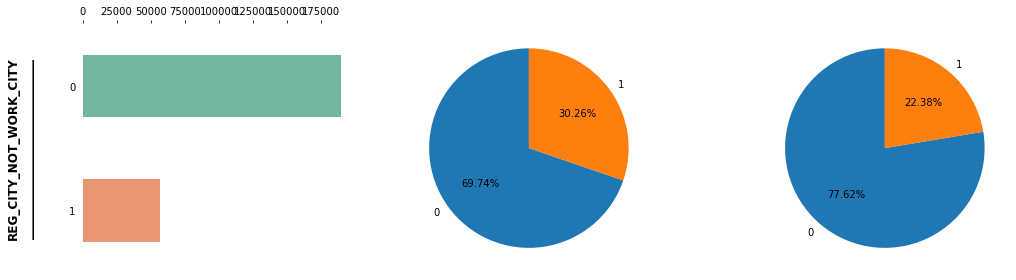

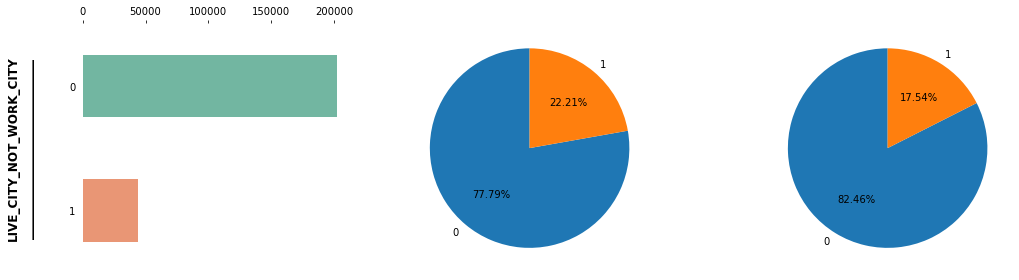

In [20]:
region = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',\
       'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION',\
       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY']
for col in region:
       cat_visual(df,col)

for i in ['REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY']:
    col_drop.append(i)

In [21]:
# plt.figure(figsize=(12,7))
# sns.heatmap(df[region].corr(),annot=True)
# # drop region rateing client, keep the 2nd becust is was taken into consideration
# # drop 'REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
# # drop'LIVE_REGION_NOT_WORK_REGION',REG_CITY_NOT_LIVE_CITY'
# #  consider drop 'REG_CITY_NOT_WORK_CITY' or 'LIVE_CITY_NOT_WORK_CITY'

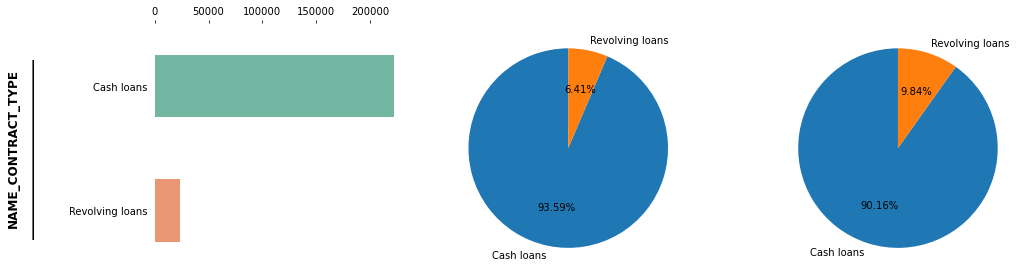

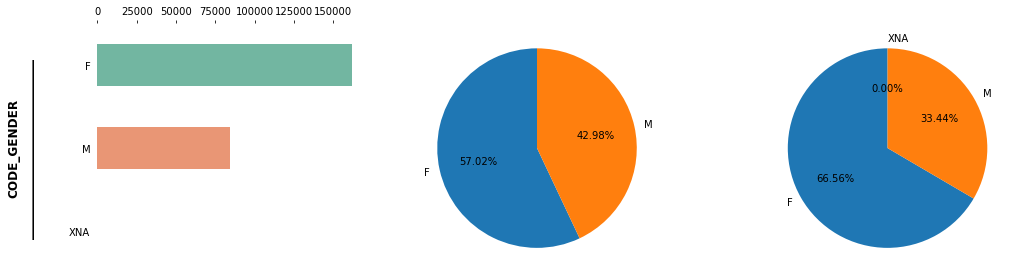

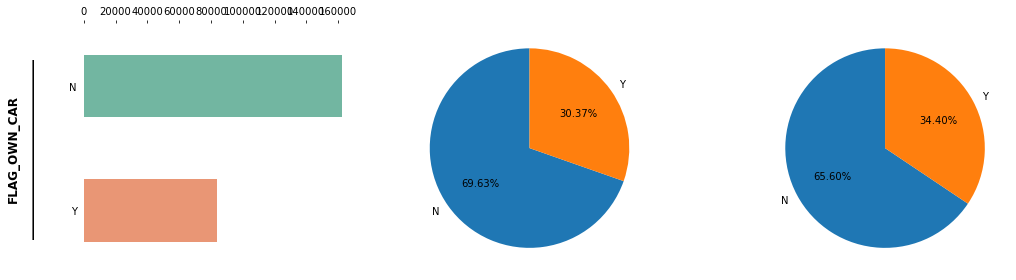

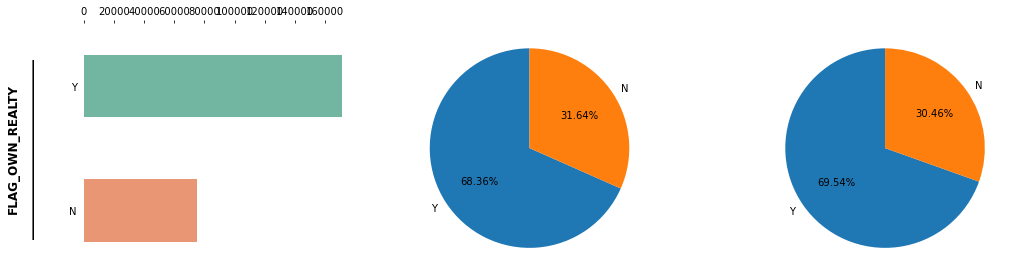

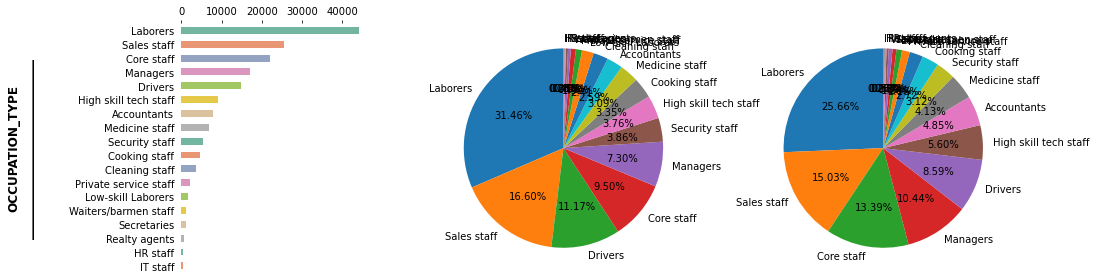

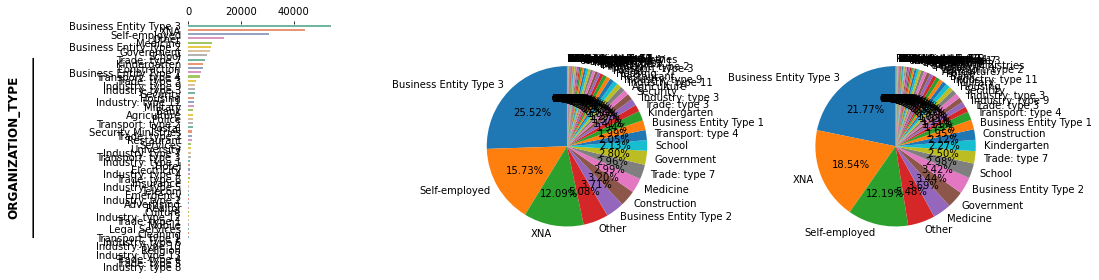

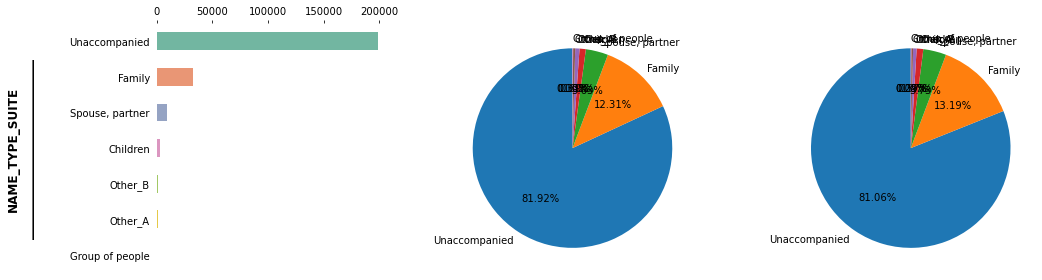

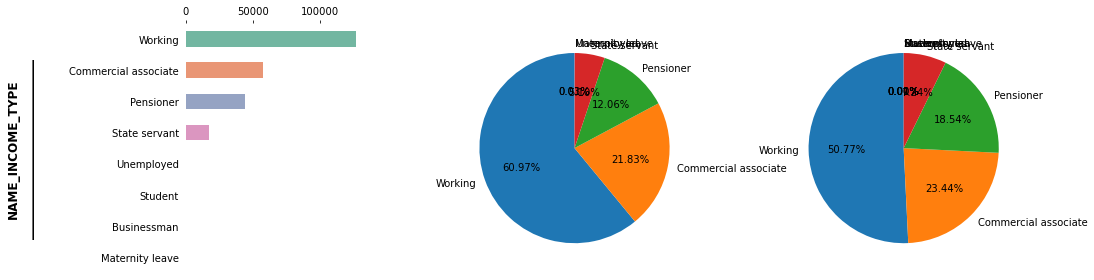

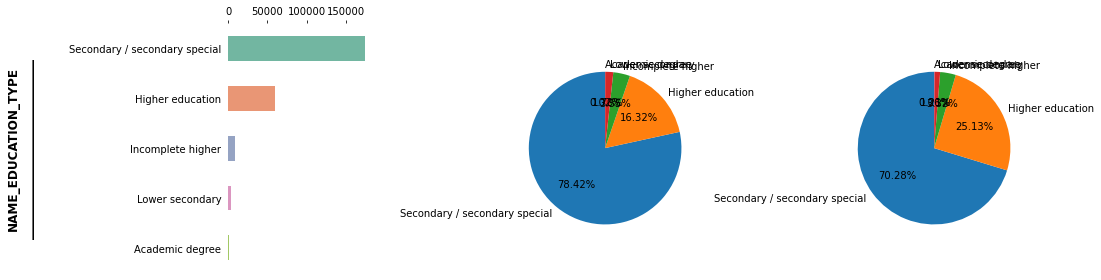

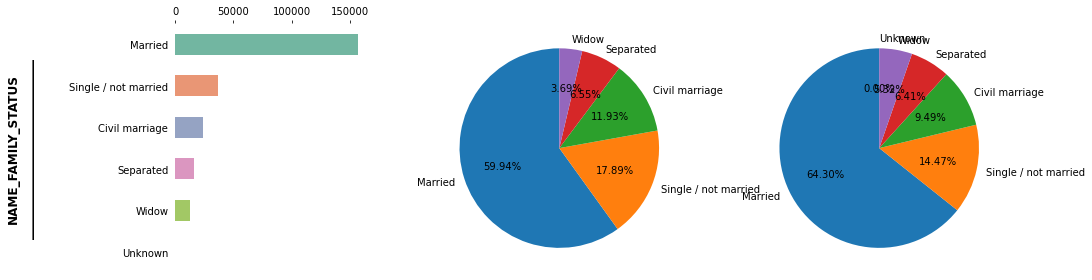

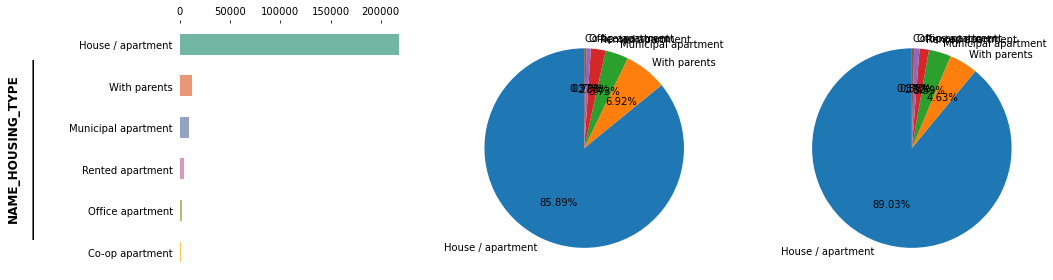

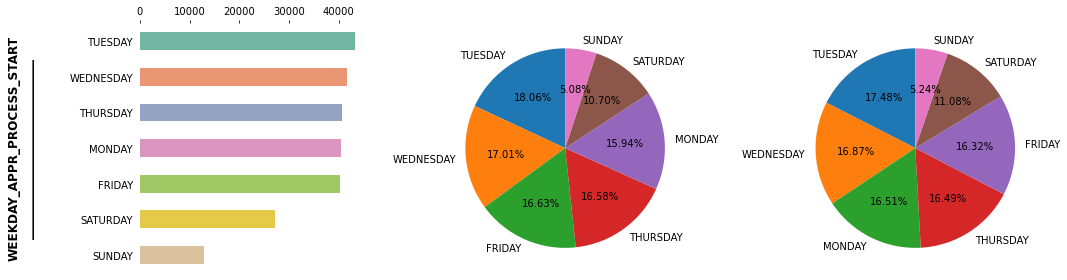

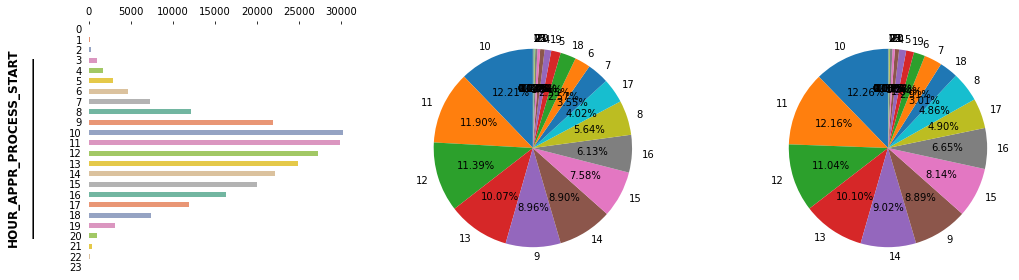

In [22]:
cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY',\
'OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE',\
'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',\
'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START']
for i in cols:
    cat_visual(df,i)

In [23]:
# 'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','OCCUPATION_TYPE', ổn rồi
# code gender co it null XNA
# include less appearance variable 'NAME_TYPE_SUITE','NAME_INCOME_TYPE',
# 'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',

# insignt 'WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START' khong co su thay doi nhieu lam

# FINANCIAL CONDITION

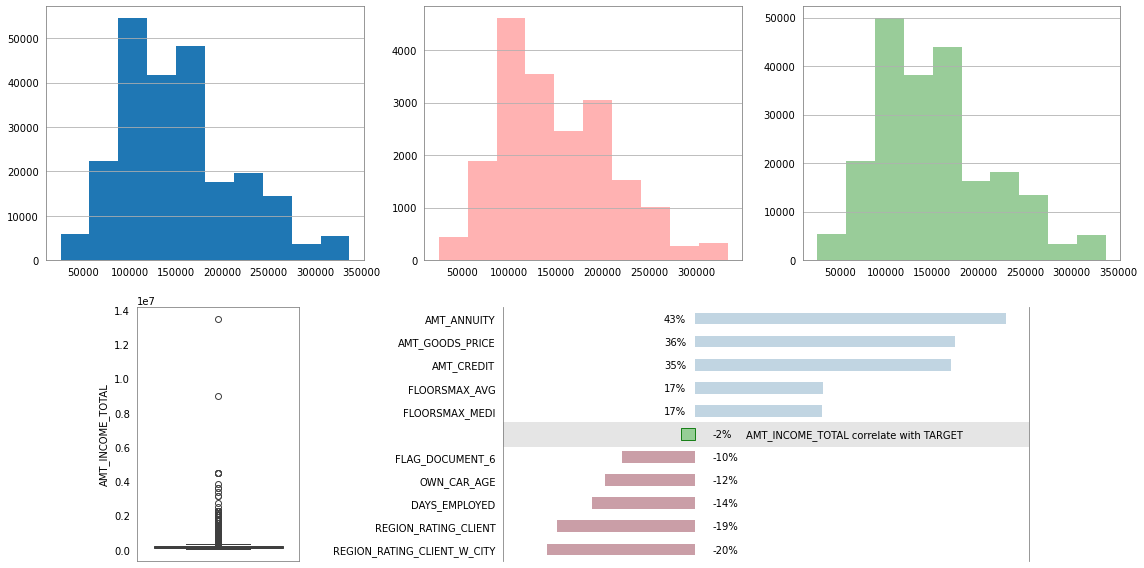

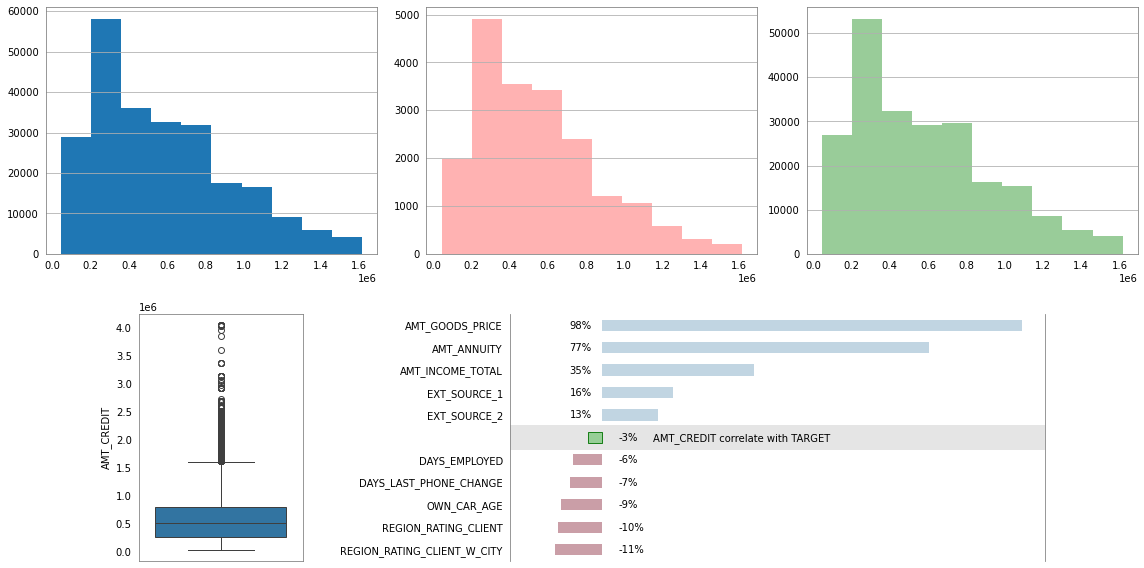

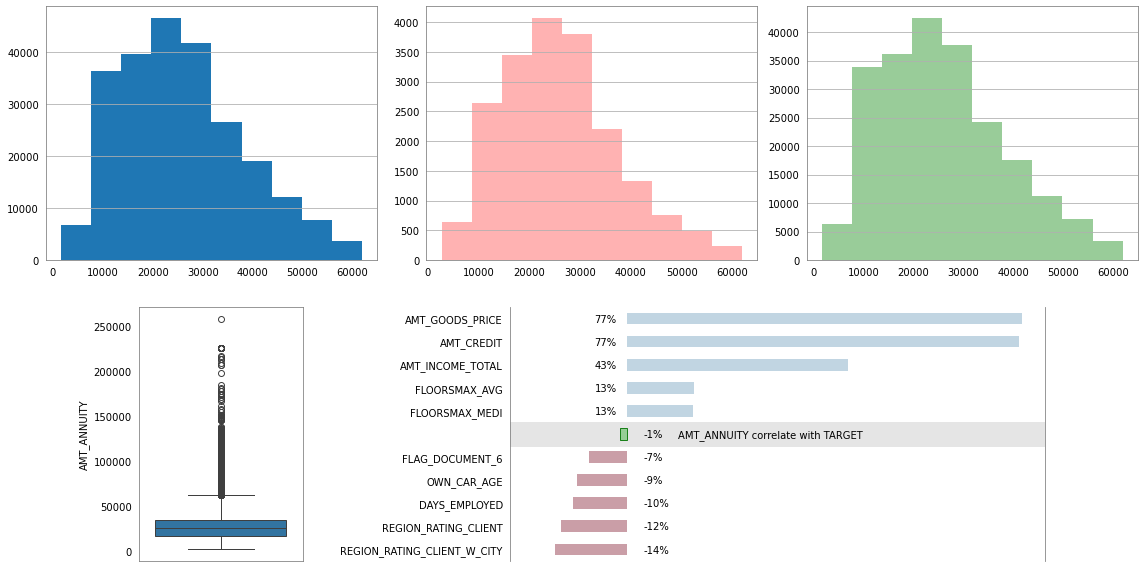

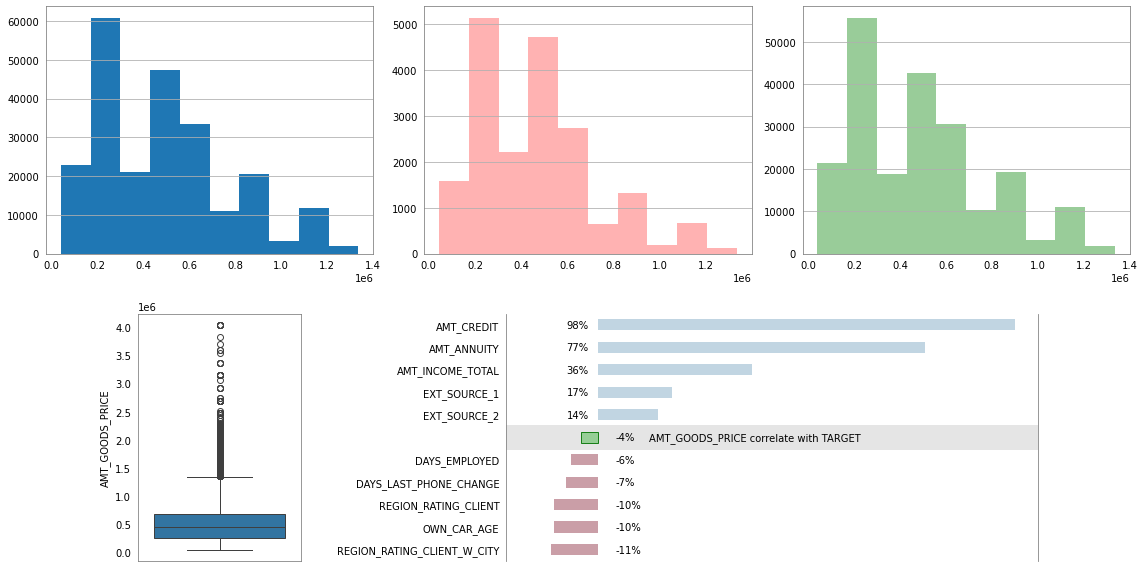

In [24]:
fin = ['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']
for col in fin:
    num_visual(df,col)

for i in ['AMT_GOODS_PRICE','AMT_ANNUITY']:
    col_drop.append(i)

# FAMILY

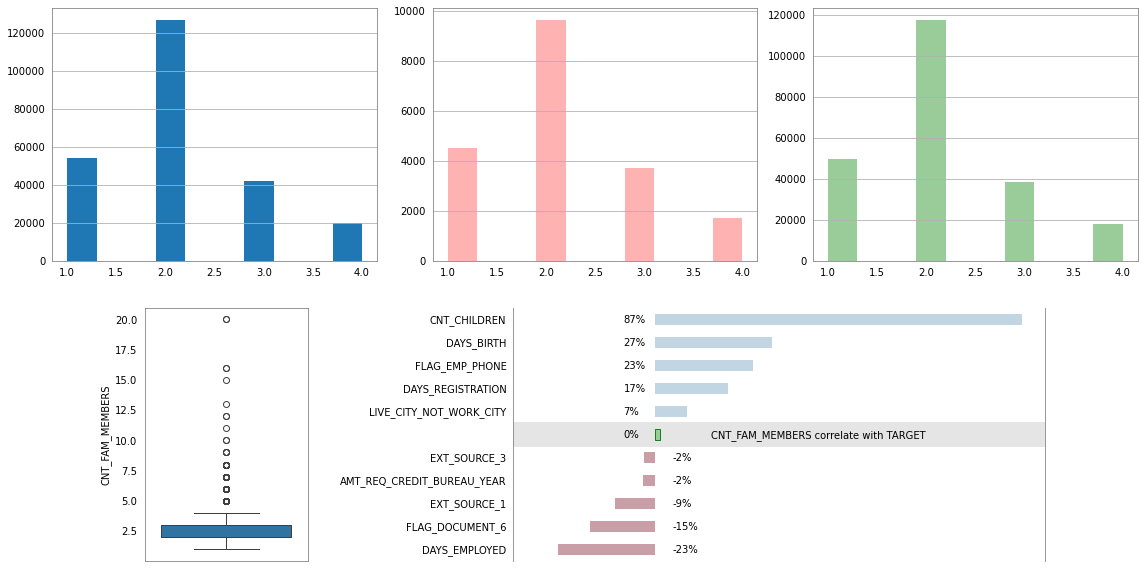

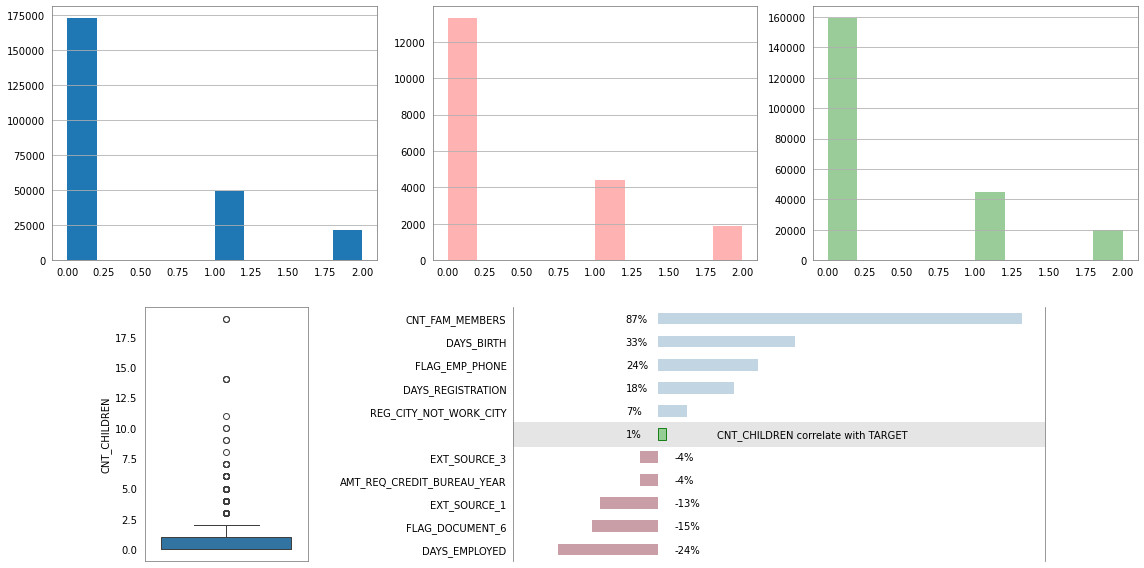

In [25]:
fam = ['CNT_FAM_MEMBERS','CNT_CHILDREN'] # astype('int)
for col in fam:
    num_visual(df,col)

In [26]:
# def fence(df, feature):
#     q1 = df[feature].quantile(0.25)
#     q3 = df[feature].quantile(0.75)
#     upper = q3 + 1.5*(q3-q1)
#     lower = q1 - 1.5*(q3-q1)
#     return lower, upper

# def cat_visual(df,feature):
#     f, ax = plt.subplots(1,3,figsize = (5*3,4),gridspec_kw={'width_ratios':[1.5,2,2]})
#     #1
#     sns.barplot(df[feature].value_counts(),\
#                 orient='h',ax=ax[0],palette='Set2',width = 0.5)
#     ax[0].spines[['top','bottom','left','right']].set_visible(False)
#     ax[0].tick_params(left=False)
#     ax[0].xaxis.tick_top() 
#     ax[0].set_xlabel('')
#     #2
#     ax[1].pie(x=df[df['TARGET']==1][feature].value_counts(),\
#     labels=df[df['TARGET']==1][feature].value_counts().index,\
#     startangle=90,autopct='%.2f%%') 
#     #3
#     ax[2].pie(x=df[df['TARGET']==0][feature].value_counts(),\
#     labels=df[df['TARGET']==0][feature].value_counts().index,\
#     startangle=90,autopct='%.2f%%') 
    
#     #beautify
#     ax[0].set_ylabel(feature+'\n'+'_'*30+'\n\n',fontweight = 'bold',fontsize=12)

#     plt.tight_layout(w_pad=2,h_pad=2)
# cat_visual(df,'FLAG_MOBIL')

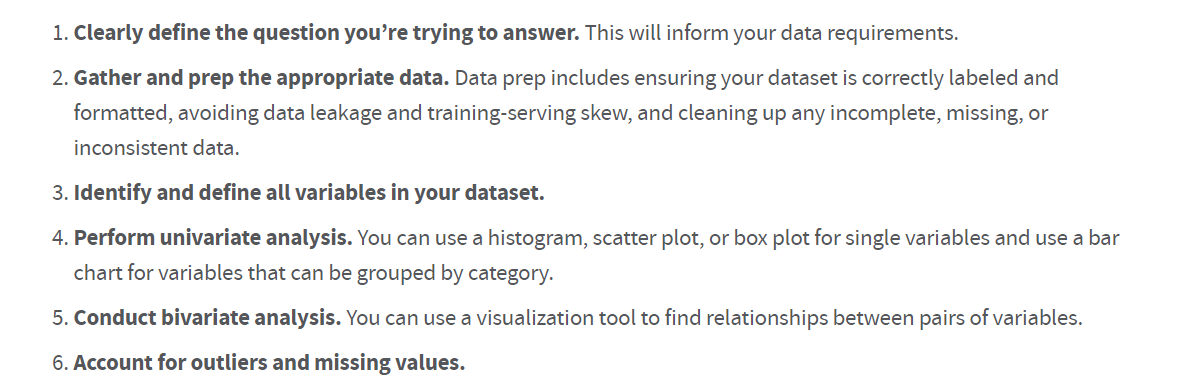

In [27]:
col_drop

['COMMONAREA_MODE',
 'COMMONAREA_AVG',
 'COMMONAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAPARTMENTS_MODE',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAPARTMENTS_MODE',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_AVG',
 'FLOORSMIN_MODE',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_AVG',
 'LANDAREA_MODE',
 'LANDAREA_MEDI',
 'BASEMENTAREA_MODE',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'ELEVATORS_MODE',
 'ELEVATORS_MEDI',
 'ELEVATORS_AVG',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_MEDI',
 'APARTMENTS_AVG',
 'ENTRANCES_AVG',
 'ENTRANCES_MODE',
 'ENTRANCES_MEDI',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_AVG',
 'LIVINGAREA_MODE',
 'HOUSETYPE_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMAX_MEDI',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BEGINEXPLUATATION